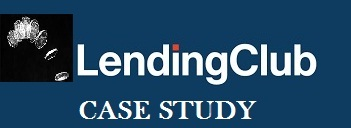

**I work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:**



*  *If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company*
*  *If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company*

I "Ravikiran Gururaja" herewith submitting one Ipython notebook which clearly explains the thought process behind my analysis (either in comments of markdown text), code, relevant plots and images.



In [ ]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
##Importing relevant packages
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
%matplotlib inline

In [ ]:
##Confirming the encoding of the loan.csv file
import chardet
import os
file_path = os.path.join(r"loan.csv")
raw_data = open(file_path, 'rb').readline()

encoding = chardet.detect(raw_data)
print("File encoding details:\n",encoding)

File encoding details:
 {'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


The default encoding detected is 'ascii' with 100% confidence level. Hence, we can proceed.

In [ ]:
##Read 'loan.csv' file
import pandas as pd

loan_file_path=pd.read_csv('/content/loan.csv')
# loan_file_path['member_id'] = loan_file_path['member_id'].map(lambda x: x.strip ('member_'))
print(loan_file_path)


            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   
1       60 months   15.27%     

In [ ]:
loan_file_path.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
##Stripping off white_spaces from the column name(if any)
import pandas as pd

loan_file_path = loan_file_path.rename(columns= lambda x: x.strip(), inplace=False)
loan_file_path.describe()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [ ]:
##Define shape of the loan_file_path dataframe

loan_file_path.shape

(39717, 111)

In [ ]:
#Total data available at start
total_data_before = loan_file_path.shape[0]
print("total_records (at the start):",total_data_before)

total_records (at the start): 39717


# **Data Cleaning and Manipulation**
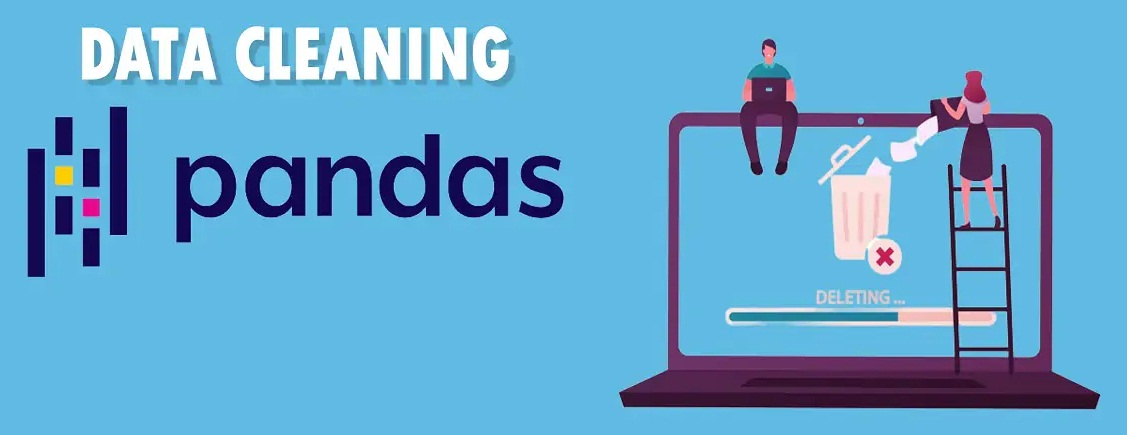

*There are in total 39K rows & 111 columns in the dataset, so creating a function to drop columns that have NaN Values over a threshold makes sense*

In [ ]:
loan_file_path=pd.read_csv('/content/loan.csv')
print (loan_file_path)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   
1       60 months   15.27%     

In [ ]:
loan_file_path['emp_title']

0                               NaN
1                             Ryder
2                               NaN
3               AIR RESOURCES BOARD
4          University Medical Group
                    ...            
39712               FiSite Research
39713    Squarewave Solutions, Ltd.
39714                           NaN
39715                           NaN
39716              Evergreen Center
Name: emp_title, Length: 39717, dtype: object

In [ ]:
def dropnacolrow(df,val=1,percent=50):
    '''
    df is the dataframe that needs to be manipulated
    val :val = 0 represents drop rows , val =1 represents drop column (default value is 1 for column manipulation)
    percent is the total percentage value that will be used as threshold to see how much % of NaN values are there in the column
    '''

    df_newp = df.copy()

    if val == 1:
        columns_NA_percent = 100*df_newp.isnull().sum()/len(df_newp.index)
        list_NA_columns = list(columns_NA_percent[(columns_NA_percent> percent)].index)
        df_newp.drop(list_NA_columns, axis=1, inplace=True)
        print("Total number of dropped columns (with more than 50% missing values):",len(list_NA_columns))
        print("\nDropped column names are as follows:",list_NA_columns)
    else:
        rows_NA_percent = 100*df_newp.isnull().sum(axis=1)/len(df_newp.index)
        list_NA_rows = list(rows_NA_percent[(rows_NA_percent> percent)].index)
        df_newp.drop(list_NA_rows, axis=0, inplace=True)
        print("Total number of dropped rows (with more than 50% missing values):",len(list_NA_rows))
        print("\nDropped row names are as follows:",list_NA_rows)

    return df_newp

In [ ]:
##Retaining the columns with <=50% missing values
loan_file_path = dropnacolrow(loan_file_path,val=1,percent=50)

Total number of dropped columns (with more than 50% missing values): 57

Dropped column names are as follows: ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 

In [ ]:
##Retaining the rows with <=50% missing values
loan_file_path = dropnacolrow(loan_file_path,val=0,percent=50)

Total number of dropped rows (with more than 50% missing values): 0

Dropped row names are as follows: []


In [ ]:
loan_file_path.shape

(39717, 54)

In [ ]:
loan_file_path.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [ ]:
##Creating a function to remove single value unique columns from the dataframe
def remove_single_val_uniq_col(df):
    df_newsingle = df.copy()

    uniq_svcol = df_newsingle.nunique() ==1
    list_uniq_svcol = list(uniq_svcol[uniq_svcol.values== True].index)
    df_newsingle.drop(list_uniq_svcol, axis=1, inplace=True)
    return df_newsingle

In [ ]:
##Removing single value unique columns from the dataframe
loan_file_path = remove_single_val_uniq_col(loan_file_path)
loan_file_path.shape

(39717, 45)

In [ ]:
##Removing duplicate rows (if any)
loan_file_path = loan_file_path.drop_duplicates()
loan_file_path.shape

(39717, 45)

In [ ]:
loan_file_path.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [ ]:
##Dropping 'member_id' as they are internal system generated. Just retaining 'id' as they are unique LC assigned ID for every record
loan_file_path.drop(['member_id'],axis = 1,inplace = True)

In [ ]:
##Checking 'zip_code' column
loan_file_path.zip_code.head()

0    860xx
1    309xx
2    606xx
3    917xx
4    972xx
Name: zip_code, dtype: object

Dropping 'url', 'zip_code' , 'desc' columns as well since 'url' is the page url that holds the LC data, 'zip_code' have only the first three numbers, and 'desc' is more of the free text provided by the borrower (exact details of 'desc' are mentioned in the purpose and title columns respectively).

In [ ]:
##Dropping 'url', 'zip_code' and 'desc' from the dataframe
loan_file_path.drop(['url','zip_code','desc'],axis = 1,inplace = True)

Retaining only the loan applicant (customer) related variables and loan characteristics variables. Removing the columns form the dataframe that indicate customer behaviour variables as these are generated after the loan is approved. These variables are listed in the 'drop_list' are as follows:

Note: We shall keep the 'pub_rec'(Number of derogatory public records) and 'pub_rec_bakruptcies'(Number of public record bankruptcies) columns to see whether such applicants corresponded to being defaulters or not.

In [ ]:
##List of additional columns to be dropped as they aren't of much use for our analysis
drop_list = ['delinq_2yrs','inq_last_6mths','open_acc','revol_bal','revol_util',\
             'total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',\
             'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',\
             'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']
loan_file_path.drop(drop_list, axis = 1,inplace = True)

In [ ]:
#Checking % of NaNs in columns (>0)
missing_val_cols_prcnt = round(100*loan_file_path.isnull().sum()/len(loan_file_path.index),4)
missing_val_cols_prcnt[missing_val_cols_prcnt!=0]

emp_title               6.1913
emp_length              2.7066
title                   0.0277
pub_rec_bankruptcies    1.7549
dtype: float64

In [ ]:
##Since the %of NanNs in 'title' column are very small. Dropping the rows with null values in these columns
loan_file_path = loan_file_path[~(loan_file_path.title.isnull())]
missing_val_cols_prcnt = round(100*loan_file_path.isnull().sum()/len(loan_file_path.index),4)
missing_val_cols_prcnt[missing_val_cols_prcnt!=0]

emp_title               6.1880
emp_length              2.7049
pub_rec_bankruptcies    1.7554
dtype: float64

In [ ]:
##Checking unique entries in pub_rec_bankruptcies
print(loan_file_path.pub_rec_bankruptcies.unique())
print(loan_file_path.pub_rec_bankruptcies.dtype)

[ 0.  1.  2. nan]
float64


In [ ]:
##Percentage of unique values in 'pub_rec_bankruptcies' column
loan_file_path.pub_rec_bankruptcies.value_counts(dropna=False, normalize=True).mul(100).round(3)

0.0    94.011
1.0     4.216
NaN     1.755
2.0     0.018
Name: pub_rec_bankruptcies, dtype: float64

The number of '0' records in 'pub-rec-bankruptcies' are 94.013%. Considering the bins of values, we can use the mode representation of the data to impute the missing values which are 1.758%. Hence, imputing these missing values with '0' to retain the records with other relevant information and retaining the sample size.

In [ ]:
##Imputing NaNs in 'pub_rec_bankruptcies' column with '0' and converting the dtype to 'int'
loan_file_path.pub_rec_bankruptcies.fillna('0',inplace=True)
loan_file_path.pub_rec_bankruptcies = loan_file_path.pub_rec_bankruptcies.astype('int')

In [ ]:
##Recheck 'pub_rec_bankruptcies' column unique values and dtype
print(loan_file_path.pub_rec_bankruptcies.unique())
print(loan_file_path.pub_rec_bankruptcies.dtype)

[0 1 2]
int64


In [ ]:
#Missing value columns percentages
missing_val_cols_prcnt = round(100*loan_file_path.isnull().sum()/len(loan_file_path.index),2)
missing_val_cols_prcnt[missing_val_cols_prcnt!=0]

emp_title     6.19
emp_length    2.70
dtype: float64

In [ ]:
##Check 'emp_length' column
loan_file_path.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [ ]:
##Check 'emp_title' column
loan_file_path.emp_title.unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

'emp_length' and 'emp_title' columns have 6.17% and 2.69% of missing data respectively. Since, the data is not provided for the same, we would like to retain the sample size for analysis, as deleting the data would create a slight bias on other variables. Moreover, we might miss out on crucial insights obtained from the other variables within records that we would have lost if deleted such observations. Hence, retaining the records and replacing the NaNs with 'undisclosed'

In [ ]:
#Replacing null values in 'emp_title' column with 'undisclosed'
loan_file_path.emp_title.fillna('Undisclosed',inplace=True)

In [ ]:
#Replacing null values in emp_length with 'undisclosed' and since the possible values of years are from 0 to 10, making changes.
loan_file_path.emp_length.fillna("Undisclosed",inplace = True)
loan_file_path['emp_length'] = loan_file_path['emp_length'].replace({"< 1 year":'0','10+ years':'10'})
loan_file_path['emp_length'] = loan_file_path['emp_length'].str.strip().str.strip(' years')
loan_file_path.emp_length.unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7',
       'Undisclosed'], dtype=object)

In [ ]:
loan_file_path.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,earliest_cr_line,pub_rec,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,Undisclosed,...,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,Jan-85,0,0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,Apr-99,0,0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,Undisclosed,...,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,Nov-01,0,0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,Feb-96,0,0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,Source Verified,Dec-11,Current,other,Personal,OR,17.94,Jan-96,0,0


In [ ]:
loan_file_path.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
addr_state               object
dti                     float64
earliest_cr_line         object
pub_rec                   int64
pub_rec_bankruptcies      int64
dtype: object

In [ ]:
##Convert the datatype of 'loan_amnt'and 'funded_amnt' columns to float type
cols = ['loan_amnt','funded_amnt']
loan_file_path[cols] = loan_file_path[cols].astype(float)

In [ ]:
loan_file_path[cols].dtypes

loan_amnt      float64
funded_amnt    float64
dtype: object

In [ ]:
##Looking at the column names seems like datetime columns end with '_d' and getting the list of all such variables so we can convert them in to datetime datatype
list(loan_file_path.columns[loan_file_path.columns.str.endswith('_d')] )

['issue_d']

In [ ]:
loan_file_path['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [ ]:
##Apart from the data, we also have 'earliest_cr_line' 'that holds datevalue. Converting 'issue_d' and 'earliest_cr_line' columns into a datetime datatype

loan_file_path['earliest_cr_line'] = pd.to_datetime(loan_file_path['earliest_cr_line'],format='%b-%y')
loan_file_path['issue_d'] = pd.to_datetime(loan_file_path['issue_d'],format='%b-%y')

In [ ]:
loan_file_path[['issue_d','earliest_cr_line']].dtypes

issue_d             datetime64[ns]
earliest_cr_line    datetime64[ns]
dtype: object

Lets make sure that the date columns were converted correctly. Lets check what was the last Month when the loan was funded. As the loan dataset is for the loans issued between 2007-2011. Lets check the loan issue date range.

In [ ]:
loan_file_path.issue_d.min()

Timestamp('2007-06-01 00:00:00')

In [ ]:
loan_file_path.issue_d.max()

Timestamp('2011-12-01 00:00:00')

In [ ]:
##Creating month and year columns based on 'issue_d' column
loan_file_path['issue_d_month'] = loan_file_path.issue_d.dt.month
loan_file_path['issue_d_year'] = loan_file_path.issue_d.dt.year

Last loan was funded on Dec-2011 so lets check other datetime column

In [ ]:
loan_file_path['earliest_cr_line'].max()

Timestamp('2068-12-01 00:00:00')

Based on the above output, it seems there was some issue converting 'earliest_cr_line' as this is the month borrowers earliest reported credit line was opened lets fix the column to reflect correct data

In [ ]:
##Lets first create the month and date columns and then fix the year value
loan_file_path['earliest_cr_line_month'] = loan_file_path.earliest_cr_line.dt.month
loan_file_path['earliest_cr_line_year'] = loan_file_path.earliest_cr_line.dt.year
loan_file_path['earliest_cr_line_year'].sort_values(ascending=True).unique()

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2046, 2050, 2054, 2056,
       2059, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068])

Subtracting 100 from the year column where the value is greater than 2008 based on the above output.

In [ ]:
loan_file_path.loc[loan_file_path['earliest_cr_line_year'] > 2008 , 'earliest_cr_line_year']  = loan_file_path[loan_file_path['earliest_cr_line_year'] > 2008]['earliest_cr_line_year']-100

In [ ]:
loan_file_path['earliest_cr_line_year'].sort_values(ascending=True).unique()

array([1946, 1950, 1954, 1956, 1959, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008])

In [ ]:
##Fixing the data in earliest_cr_line column
loan_file_path['earliest_cr_line'] = pd.to_datetime('01-' + loan_file_path['earliest_cr_line_month'].astype('str') + '-' + loan_file_path['earliest_cr_line_year'].astype('str')  )

In [ ]:
loan_file_path['earliest_cr_line'].max()

Timestamp('2008-01-11 00:00:00')

In [ ]:
loan_file_path.int_rate.head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [ ]:
#Stripping off spaces and '%' and converting the 'int_rate' column dtype to float
loan_file_path['int_rate'] = loan_file_path['int_rate'].str.strip().str.strip('%').astype('float')
loan_file_path['int_rate'].dtypes

dtype('float64')

In [ ]:
loan_file_path.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [ ]:
#Checking 'term' column
loan_file_path.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
#Creating a function for lowercase and uppercase strings and stripping off the blank spaces around entries
'''
lower_case string, c=1 (default)
upper_case string, c=0
df: dataframe to be manipulated
list_name: columns to be manipulated
'''
def case_function(df, list_name, c=1):
    df_case = df.copy()

    if c==1:
        for i in list_name:
            df_case[i] = df_case[i].str.strip()
            df_case[i] = df_case[i].str.lower()
    else:
        for i in list_name:
            df_case[i] = df_case[i].str.strip()
            df_case[i] = df_case[i].str.upper()
    return df_case

In [ ]:
#Converting some columns to lowercase strings and stripping off blank spaces around the content
columns_lowcase = ['emp_title','home_ownership','verification_status','loan_status','purpose','title']
loan_file_path = case_function(loan_file_path, columns_lowcase, c=1)

#Converting some columns to uppercase strings throughout and stripping off blanks spaces around the content(if any)
columns_uppercase = ['grade','sub_grade','addr_state']
loan_file_path = case_function(loan_file_path, columns_uppercase, c=0)
loan_file_path.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,title,addr_state,dti,earliest_cr_line,pub_rec,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,1077501,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,undisclosed,...,computer,AZ,27.65,1985-01-01,0,0,12,2011,1,1985
1,1077430,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,ryder,...,bike,GA,1.00,1999-01-04,0,0,12,2011,4,1999
2,1077175,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,undisclosed,...,real estate business,IL,8.72,2001-01-11,0,0,12,2011,11,2001
3,1076863,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,air resources board,...,personel,CA,20.00,1996-01-02,0,0,12,2011,2,1996
4,1075358,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,university medical group,...,personal,OR,17.94,1996-01-01,0,0,12,2011,1,1996


In [ ]:
#Final check for null values in the dataframe
missing_val_cols_prcnt = round(100*loan_file_path.isnull().sum()/len(loan_file_path.index),2)
missing_val_cols_prcnt[missing_val_cols_prcnt!=0]

Series([], dtype: float64)

In [ ]:
##loan_file_path dataframe shape
loan_file_path.shape

(39706, 27)

In [ ]:
loan_file_path.dtypes

id                                 int64
loan_amnt                        float64
funded_amnt                      float64
funded_amnt_inv                  float64
term                              object
int_rate                         float64
installment                      float64
grade                             object
sub_grade                         object
emp_title                         object
emp_length                        object
home_ownership                    object
annual_inc                       float64
verification_status               object
issue_d                   datetime64[ns]
loan_status                       object
purpose                           object
title                             object
addr_state                        object
dti                              float64
earliest_cr_line          datetime64[ns]
pub_rec                            int64
pub_rec_bankruptcies               int64
issue_d_month                      int64
issue_d_year    

In [ ]:
##Total data available at after data cleaning and manipulation
total_data_after = loan_file_path.shape[0]
print("total_records (after cleaning):",total_data_after)

total_records (after cleaning): 39706


In [ ]:
##Percentage of data retained
percent_data_r = 100*(total_data_after/total_data_before)
print("Percentage of data retained:",round(percent_data_r,3))

Percentage of data retained: 99.972


In [ ]:
##Creating a 'master_f_loan' shallow copy of the 'loan_file_path' dataframe
master_f_loan  = loan_file_path.copy()

# **Data Analysis**
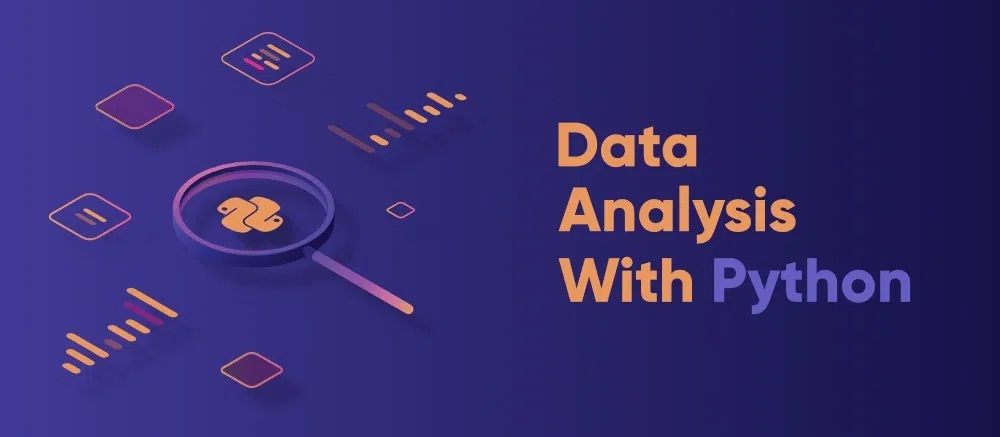

*Here on we shall be using the 'loan_file_path' dataframe as we have already created a copy of in the 'master_f_loan' dataframe*

In [ ]:
#Check 'loan_status' for value counts
loan_file_path.loan_status.value_counts()

fully paid     32941
charged off     5625
current         1140
Name: loan_status, dtype: int64

In [ ]:
##Check 'loan_status' for % of value counts
loan_file_path.loan_status.value_counts(normalize=True).mul(100).round(2)

fully paid     82.96
charged off    14.17
current         2.87
Name: loan_status, dtype: float64

**Loan Status Types:**

**Fully paid:** *Applicant has fully paid the loan (the principal and the interest rate)*

**Current:** *Applicant is in the process of paying the instalments(cannot be labelled as defaulter.)*

**Charged-off:** *Defaulters*

In [ ]:
##Considering only the candidates with 'fully paid' and 'charged off' loan_status. Removing records for 'current state', loan status.
loan_file_path = loan_file_path[~(loan_file_path["loan_status"]=='current')]

##Set values for 'loan_status' variable's unqiue entires. Assign '0' to 'fully paid' and set 'charged off' to '1' (as our target is determine 'defaulter' factors)
loan_file_path["loan_status"] = loan_file_path["loan_status"].replace('fully paid','0')
loan_file_path["loan_status"] = loan_file_path["loan_status"].replace('charged off','1') #Set Target Variable
loan_file_path.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,title,addr_state,dti,earliest_cr_line,pub_rec,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,1077501,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,undisclosed,...,computer,AZ,27.65,1985-01-01,0,0,12,2011,1,1985
1,1077430,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,ryder,...,bike,GA,1.00,1999-01-04,0,0,12,2011,4,1999
2,1077175,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,undisclosed,...,real estate business,IL,8.72,2001-01-11,0,0,12,2011,11,2001
3,1076863,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,air resources board,...,personel,CA,20.00,1996-01-02,0,0,12,2011,2,1996
5,1075269,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,veolia transportaton,...,my wedding loan i promise to pay back,AZ,11.20,2004-01-11,0,0,12,2011,11,2004


In [ ]:
#Check for assigned '0' to 'fully paid' and set 'charged off' to '1' (as our target is to determine 'defaulter' factors)
loan_file_path.loan_status.unique()

array(['0', '1'], dtype=object)

In [ ]:
loan_file_path.shape

(38566, 27)

In [ ]:
loan_file_path.dtypes

id                                 int64
loan_amnt                        float64
funded_amnt                      float64
funded_amnt_inv                  float64
term                              object
int_rate                         float64
installment                      float64
grade                             object
sub_grade                         object
emp_title                         object
emp_length                        object
home_ownership                    object
annual_inc                       float64
verification_status               object
issue_d                   datetime64[ns]
loan_status                       object
purpose                           object
title                             object
addr_state                        object
dti                              float64
earliest_cr_line          datetime64[ns]
pub_rec                            int64
pub_rec_bankruptcies               int64
issue_d_month                      int64
issue_d_year    

In [ ]:
loan_file_path.columns.nunique()

27

In [ ]:
##List of continuous variables
col_list_cont = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate',\
                        'installment','annual_inc','dti','pub_rec','pub_rec_bankruptcies']

In [ ]:
##List of categorical variables
col_list_cont = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate',\
                        'installment','annual_inc','dti','pub_rec','pub_rec_bankruptcies']

col_list_cat = pd.DataFrame(loan_file_path.columns)
col_list_cat = col_list_cat[~(col_list_cat[0].isin(col_list_cont))]
col_list_cat

,0
0,id
4,term
7,grade
8,sub_grade
9,emp_title
10,emp_length
11,home_ownership
13,verification_status
14,issue_d
15,loan_status


# ** Univariate Analysis and Segmented Univariate Analysis**
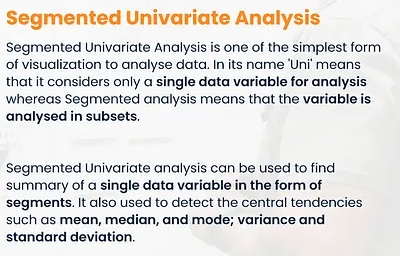

**Loan Status Analysis:**

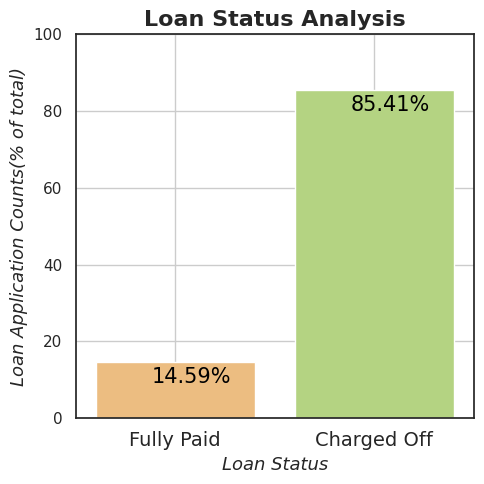

In [ ]:
##Lets check how 'loan_status'(%) is distributed
sns.set(style='white')
plt.figure(figsize=(5,5), dpi=100)
br = pd.DataFrame(loan_file_path.loan_status.value_counts(normalize=True).mul(100).sort_values())
br.reset_index(inplace=True)
br = br.rename(columns= {'loan_status':'loan_status_count'})
ax = sns.barplot(x='index',y='loan_status_count', data=br, palette='RdYlGn')
ax.set_xticklabels(labels=['Fully Paid','Charged Off'], rotation='horizontal', fontsize=14)
plt.xlabel('Loan Status', fontsize= 13, fontstyle='italic')
plt.ylabel('Loan Application Counts(% of total)', fontsize= 13, fontstyle='italic')
plt.ylim(0,100)
plt.title('Loan Status Analysis', fontsize=16, fontweight='bold')

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.28, i.get_height()-5.5, \
            str(round((i.get_height()), 2))+"%", fontsize=15, color='black',\
            rotation=0)

plt.grid(True)
plt.tight_layout()
plt.show()

#  **Observation**:  14.59 % of the total loan issued have been 'Charged Off' (Defaulted).

## **Loan Issue Year Analysis:**

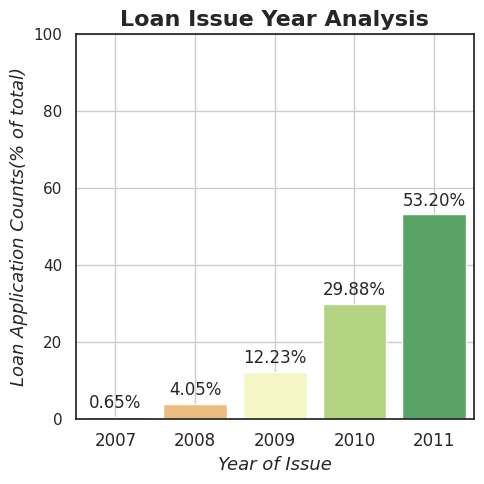

In [ ]:
##Lets check the total number of approved applications by year

sns.set(style='white')
plt.figure(figsize=(5,5), dpi=100)
br = pd.DataFrame(loan_file_path.issue_d_year.value_counts(normalize = True).mul(100).sort_values())
br.reset_index(inplace=True)
br = br.rename(columns= {'issue_d_year':'issue_d_year_count'})
ax = sns.barplot(x='index',y='issue_d_year_count', data=br, palette='RdYlGn')

plt.xlabel('Year of Issue', fontsize= 13, fontstyle='italic')
plt.ylabel('Loan Application Counts(% of total)', fontsize= 13, fontstyle='italic')
plt.title('Loan Issue Year Analysis', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.ylim(0,100)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.\
                                                    , p.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.grid(True)
plt.tight_layout()
plt.show()

## **Observation:** Based on the total number of loan applications, Lending Club (LC) has lent the most number of loans in the year 2011, followed by 2010.

**Loan Amount Issued by Year Analysis:**

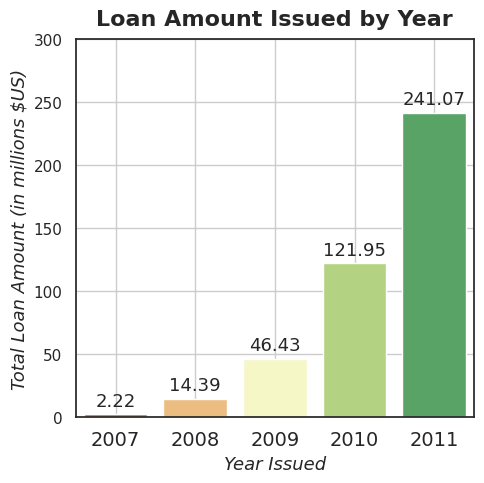

In [ ]:
### Total Laon Amount approved year over year
ln_amnt_total = pd.DataFrame(loan_file_path.groupby(['issue_d_year'])['loan_amnt'].sum())
ln_amnt_total.reset_index(inplace = True)
sns.set(style='white')
plt.figure(figsize=(5,5), dpi=100)

#New derived metric 'ln_amnt_total_millions' for total loan amount (yearwise-in millions usd)
ln_amnt_total['ln_amnt_total_millions'] = ln_amnt_total['loan_amnt']/1000000
ln_amt_tot = sns.barplot(x=ln_amnt_total['issue_d_year'],y=ln_amnt_total['ln_amnt_total_millions'], palette='RdYlGn')
ln_amt_tot.set_xticklabels(labels=list(ln_amnt_total.issue_d_year), fontsize=14)
plt.xlabel('Year Issued', fontsize= 13, fontstyle='italic')
plt.ylabel('Total Loan Amount (in millions $US)', fontsize= 13, fontstyle='italic')
plt.ylim(0,300)
plt.title('Loan Amount Issued by Year', fontsize= 16, fontweight='bold', pad=10)
for p in ln_amt_tot.patches:
    ln_amt_tot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2.
                                                , p.get_height()), ha = 'center'
                , va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=13 )
plt.grid(True)
plt.tight_layout()
plt.show()

## **Observation:** Total Loan amount has approximately doubled between years 2010 and 2011 going from 121.95 Million USD to 241.07 Million USD

**Total% of approved loan applications by Month Analysis:**

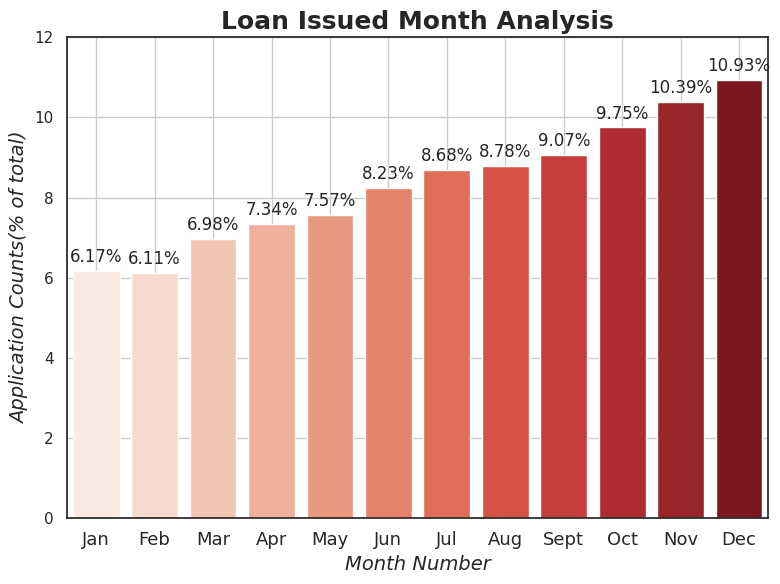

In [ ]:
##Lets check the total percentage of approved loan applications by month

sns.set(style='white')
plt.figure(figsize=(8,6), dpi=100)
br = pd.DataFrame(loan_file_path.issue_d_month.value_counts(normalize = True).mul(100).sort_values())
br.reset_index(inplace=True)
br = br.rename(columns= {'issue_d_month':'issue_d_month_count'})
ax = sns.barplot(x='index',y='issue_d_month_count', data=br, palette='Reds')

plt.xlabel('Month Number', fontsize= 14, fontstyle='italic')
plt.ylabel('Application Counts(% of total)' , fontsize= 14, fontstyle='italic')
plt.ylim(0,12)
plt.title('Loan Issued Month Analysis', fontsize=18,fontweight='bold')



for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.\
                                                    , p.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(range(0,12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',\
                       'Sept','Oct','Nov','Dec'], fontsize=13)
plt.grid(True)
plt.tight_layout()
plt.show()

# **Observtions:** From the above graph, it can be seen that the percentage (%) of loan approvals is high during the end of year (i.e.holiday time, November-December). Maximum(10.93%) in the month of December). Hence, substantial demand for loans during this period.

#  **Loan Purpose Analysis:**

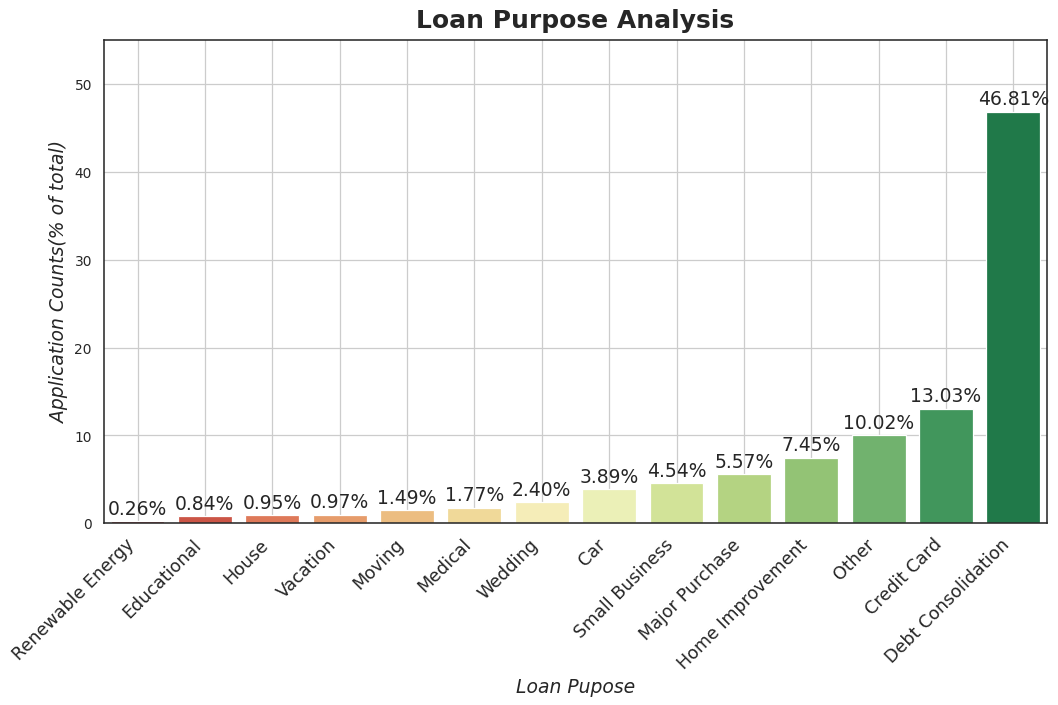

In [ ]:
##Loan Purpose analysis
sns.set(style='white')
plt.figure(figsize=(12, 8),dpi = 90)
br = pd.DataFrame(loan_file_path.purpose.value_counts(normalize = True).mul(100).sort_values())

br.reset_index(inplace=True)
br = br.rename(columns =  {'index':'Loan_Purpose'} )

ax = sns.barplot(x='Loan_Purpose',y='purpose', data=br, palette='RdYlGn')
ax.set_xticklabels(labels=list(br.Loan_Purpose), fontsize=14)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Loan Pupose', fontsize= 15, fontstyle='italic')
plt.ylabel('Application Counts(% of total)', fontsize= 15, fontstyle='italic')
plt.title('Loan Purpose Analysis', fontsize= 20, fontweight='bold', pad=10)
plt.ylim(0,55)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.\
                                                    , p.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), fontsize= 15, textcoords = 'offset points' )

plt.xticks(range(0,14),['Renewable Energy','Educational','House','Vacation','Moving','Medical','Wedding','Car',\
                       'Small Business','Major Purchase','Home Improvement','Other','Credit Card','Debt Consolidation'])
plt.grid(True)
plt.tight_layout()
plt.show()

# **Observation:** **Debt consolidation is the major reason for requesting a loan; followed by credit card.

**Address State Analysis(% wise) of Loan Applicants**

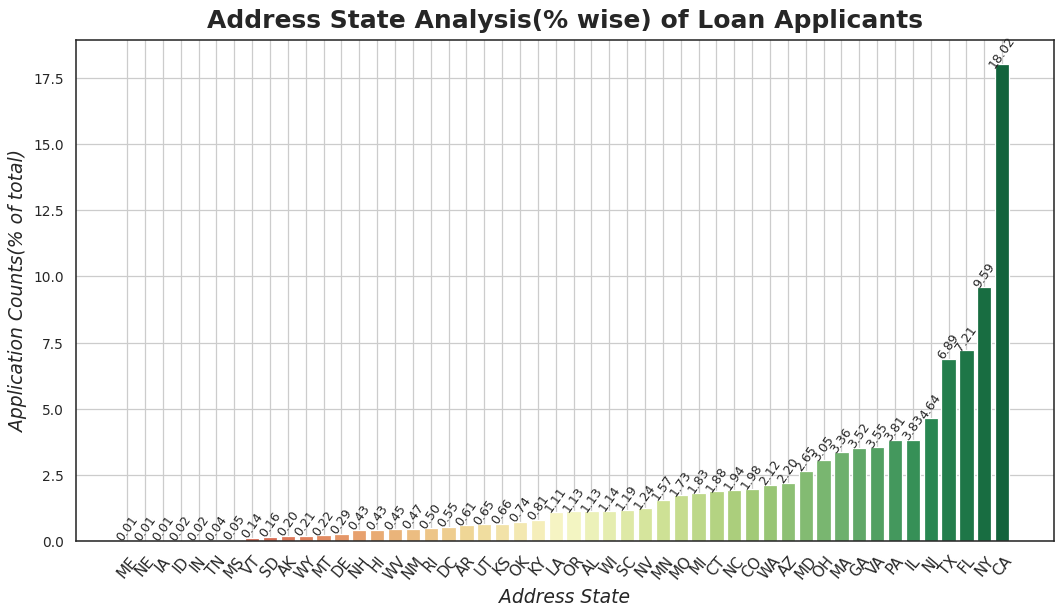

In [ ]:
##Address State Analysis(% wise) of Loan Applicants
sns.set(style='white')
plt.figure(figsize=(12, 7),dpi = 90)
ad = pd.DataFrame(loan_file_path.addr_state.value_counts(normalize=True).mul(100).round(2).sort_values().to_frame('pct_count'))
ad.reset_index(inplace=True)
ad['states'] = ad['index']

ax_07 = sns.barplot(x='index',y='pct_count', data=ad, palette='RdYlGn')
ax_07.set_xticklabels(labels=list(ad.index), fontsize=14)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Address State', fontsize= 15, fontstyle='italic')
plt.ylabel('Application Counts(% of total)', fontsize= 15, fontstyle='italic')
plt.title('Address State Analysis(% wise) of Loan Applicants', fontsize= 20, fontweight='bold', pad=10)
plt.ylim(0,100)

for p in ax_07.patches:
    ax_07.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2.\
                                                    , p.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), fontsize= 10, textcoords = 'offset points', rotation=55 )
plt.xticks(range(0,50), list(ad.states), fontsize=12, rotation=50)
plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()

# **Observation:** Maximum number of loan applicants were from 'CA' around (18.02%), followed by 'NY' state.

# **'Applicant's Loan amount' analysis:**

**Note:** 'loan_amnt' is the Loan Amount: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. Analyzing this variable.

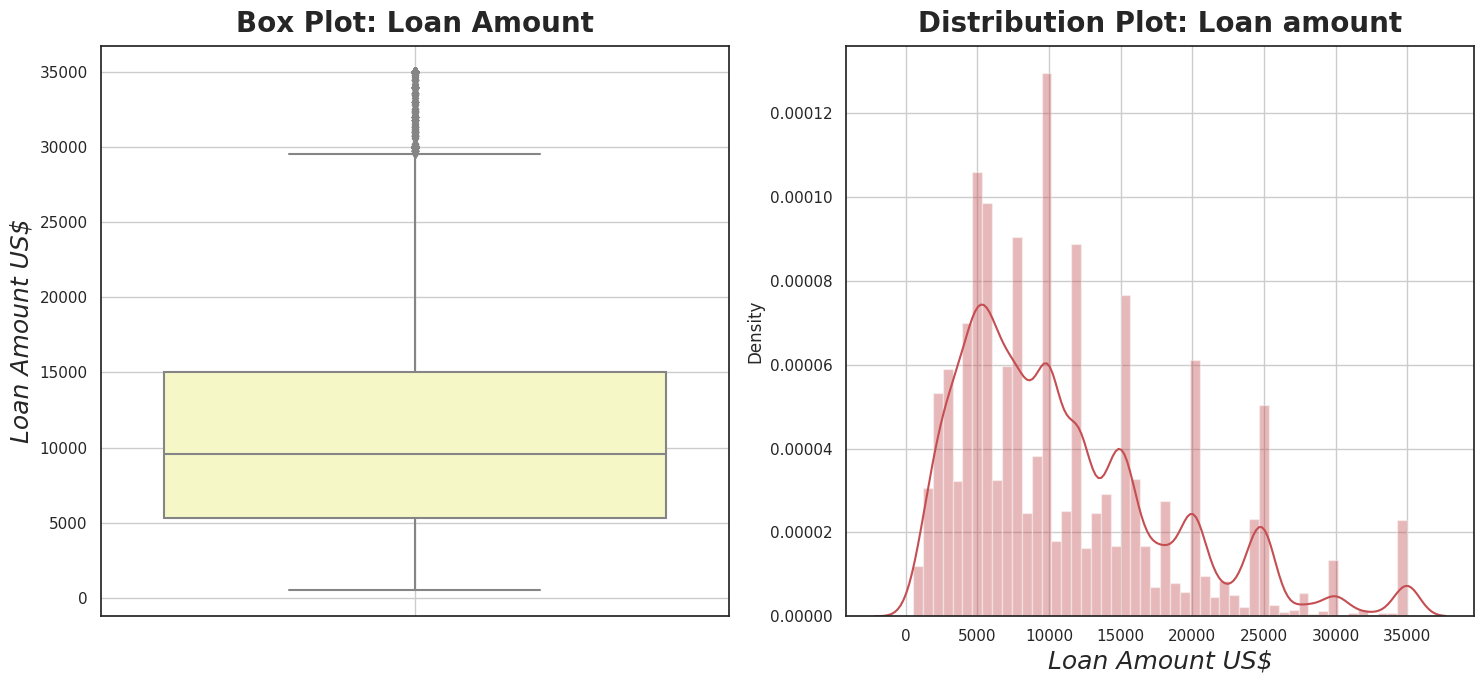

In [ ]:
#'Applicant's Loan amount' analysis.
plt.figure(figsize=(15,7))
sns.set(style='white')

plt.subplot(1, 2, 1)

sns.boxplot(y = loan_file_path.loan_amnt , palette='RdYlGn')
plt.title('Box Plot: Loan Amount', fontsize= 20, fontweight='bold', pad=10)
plt.ylabel('Loan Amount US$', fontsize= 18, fontstyle='italic')
plt.grid(True)


plt.subplot(1, 2, 2)
sns.distplot(loan_file_path.loan_amnt , hist= True,color="r" )
plt.title('Distribution Plot: Loan amount', fontsize= 20, fontweight='bold', pad=10)
plt.xlabel('Loan Amount US$', fontsize= 18, fontstyle='italic')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
loan_file_path.loan_amnt.describe()

count    38566.000000
mean     11047.429083
std       7348.566643
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

# **Observation:** The loan amount of the borrower has an average of 9,600 usd per loan and 50 % of the applicants are approved for a loan amount between 5,300 and 15,000 USD.

# **Applicant's Annual Income Analysis:**

In [ ]:
#Analyzing the applicant's annual income variable
round(loan_file_path.annual_inc.describe(percentiles=[0, 0.25, 0.50, 0.75, 0.90, 0.95, 0.98, 0.99]))

count      38566.0
mean       68782.0
std        64226.0
min         4000.0
0%          4000.0
25%        40000.0
50%        58876.0
75%        82000.0
90%       115000.0
95%       140004.0
98%       187000.0
99%       234210.0
max      6000000.0
Name: annual_inc, dtype: float64

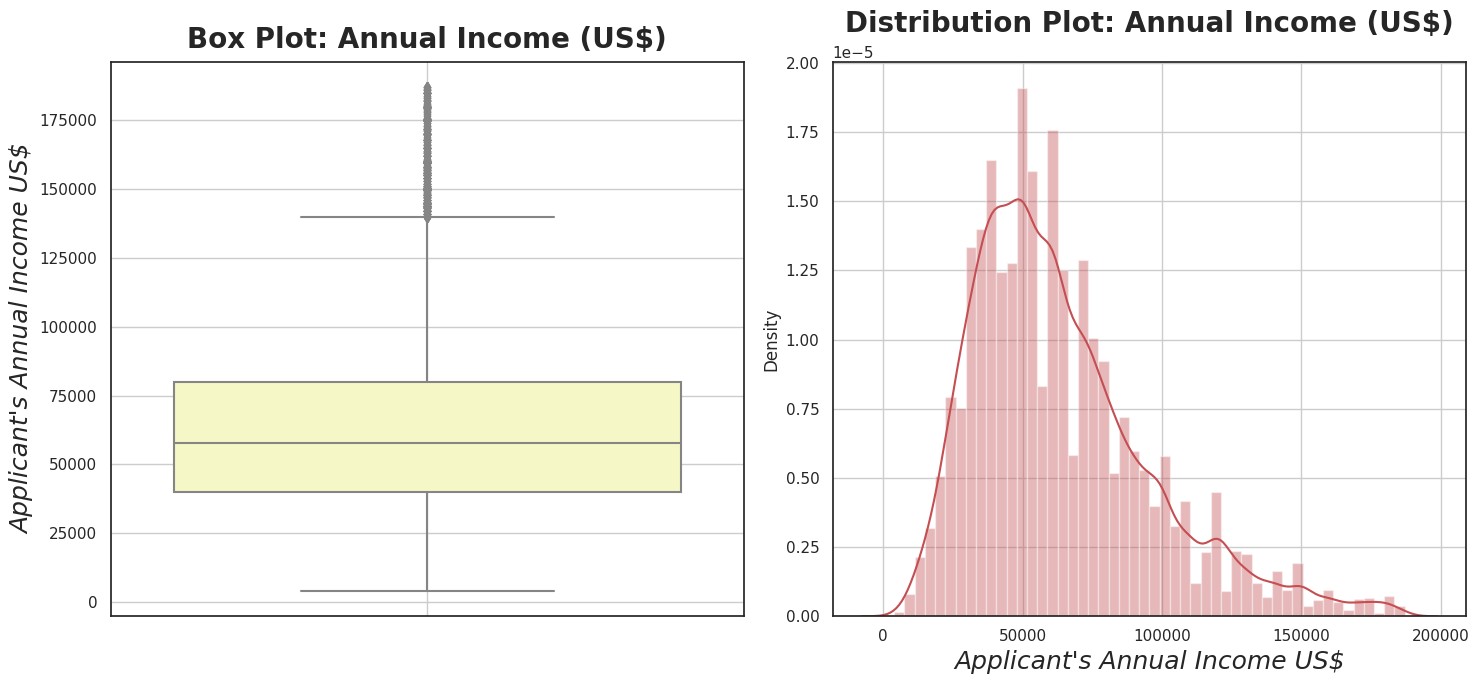

In [ ]:
#Eliminating the outliers for analysis, and only considering the data below 98th percentile.
plt.figure(figsize=(15,7))
sns.set(style='white')

plt.subplot(1, 2, 1)
sns.boxplot(y = loan_file_path[loan_file_path.annual_inc <= 187000 ]['annual_inc'],palette='RdYlGn')
plt.title("Box Plot: Annual Income (US$)", fontsize= 20, fontweight='bold', pad=10)
plt.ylabel("Applicant's Annual Income US$", fontsize= 18, fontstyle='italic')
plt.grid(True)


plt.subplot(1, 2, 2)
sns.distplot(loan_file_path[loan_file_path.annual_inc <= 187000 ]['annual_inc'] , hist= True ,color="r")
plt.title("Distribution Plot: Annual Income (US$)", fontsize= 20, fontweight='bold', pad=10)
plt.xlabel("Applicant's Annual Income US$", fontsize= 18, fontstyle='italic')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
round(loan_file_path.annual_inc.describe())

count      38566.0
mean       68782.0
std        64226.0
min         4000.0
25%        40000.0
50%        58876.0
75%        82000.0
max      6000000.0
Name: annual_inc, dtype: float64

# **Observation:** Only looking at data (where the applicant's annual income is less than or equal to the 98th percentile value), the mean annual salary of the applicant is 68.78K USD, median salary is 58.87K USD and 50 % of the customers have a salary range between 40k and 82k USD.

# **# Bivariate Analysis**
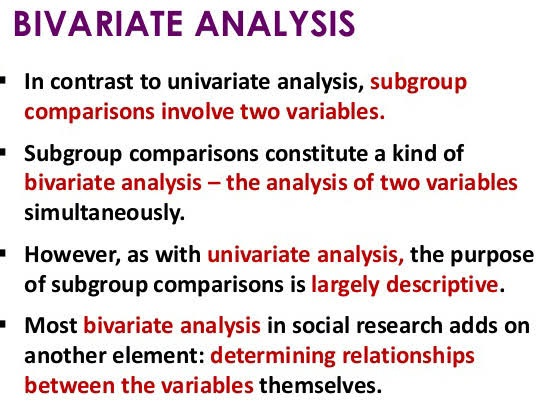
## **Classification of variables**

**(i) List of Continuous Variables:**

In [ ]:
#Recall ist of continuous variables
col_list_cont

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'pub_rec',
 'pub_rec_bankruptcies']

**(ii) List of Categorical Variables:**

In [ ]:
#Recall
col_list_cat

,0
0,id
4,term
7,grade
8,sub_grade
9,emp_title
10,emp_length
11,home_ownership
13,verification_status
14,issue_d
15,loan_status


# Correlation Matrix:
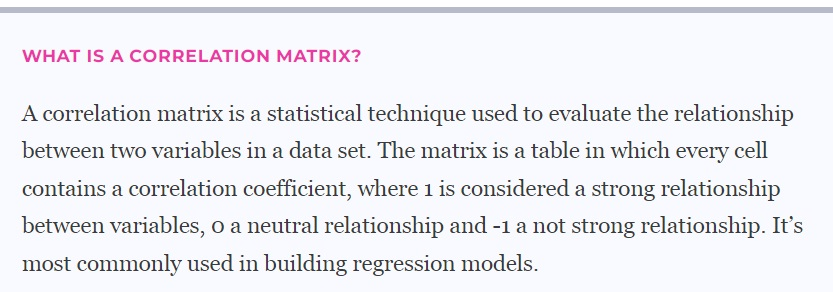

<Figure size 6000x6000 with 0 Axes>

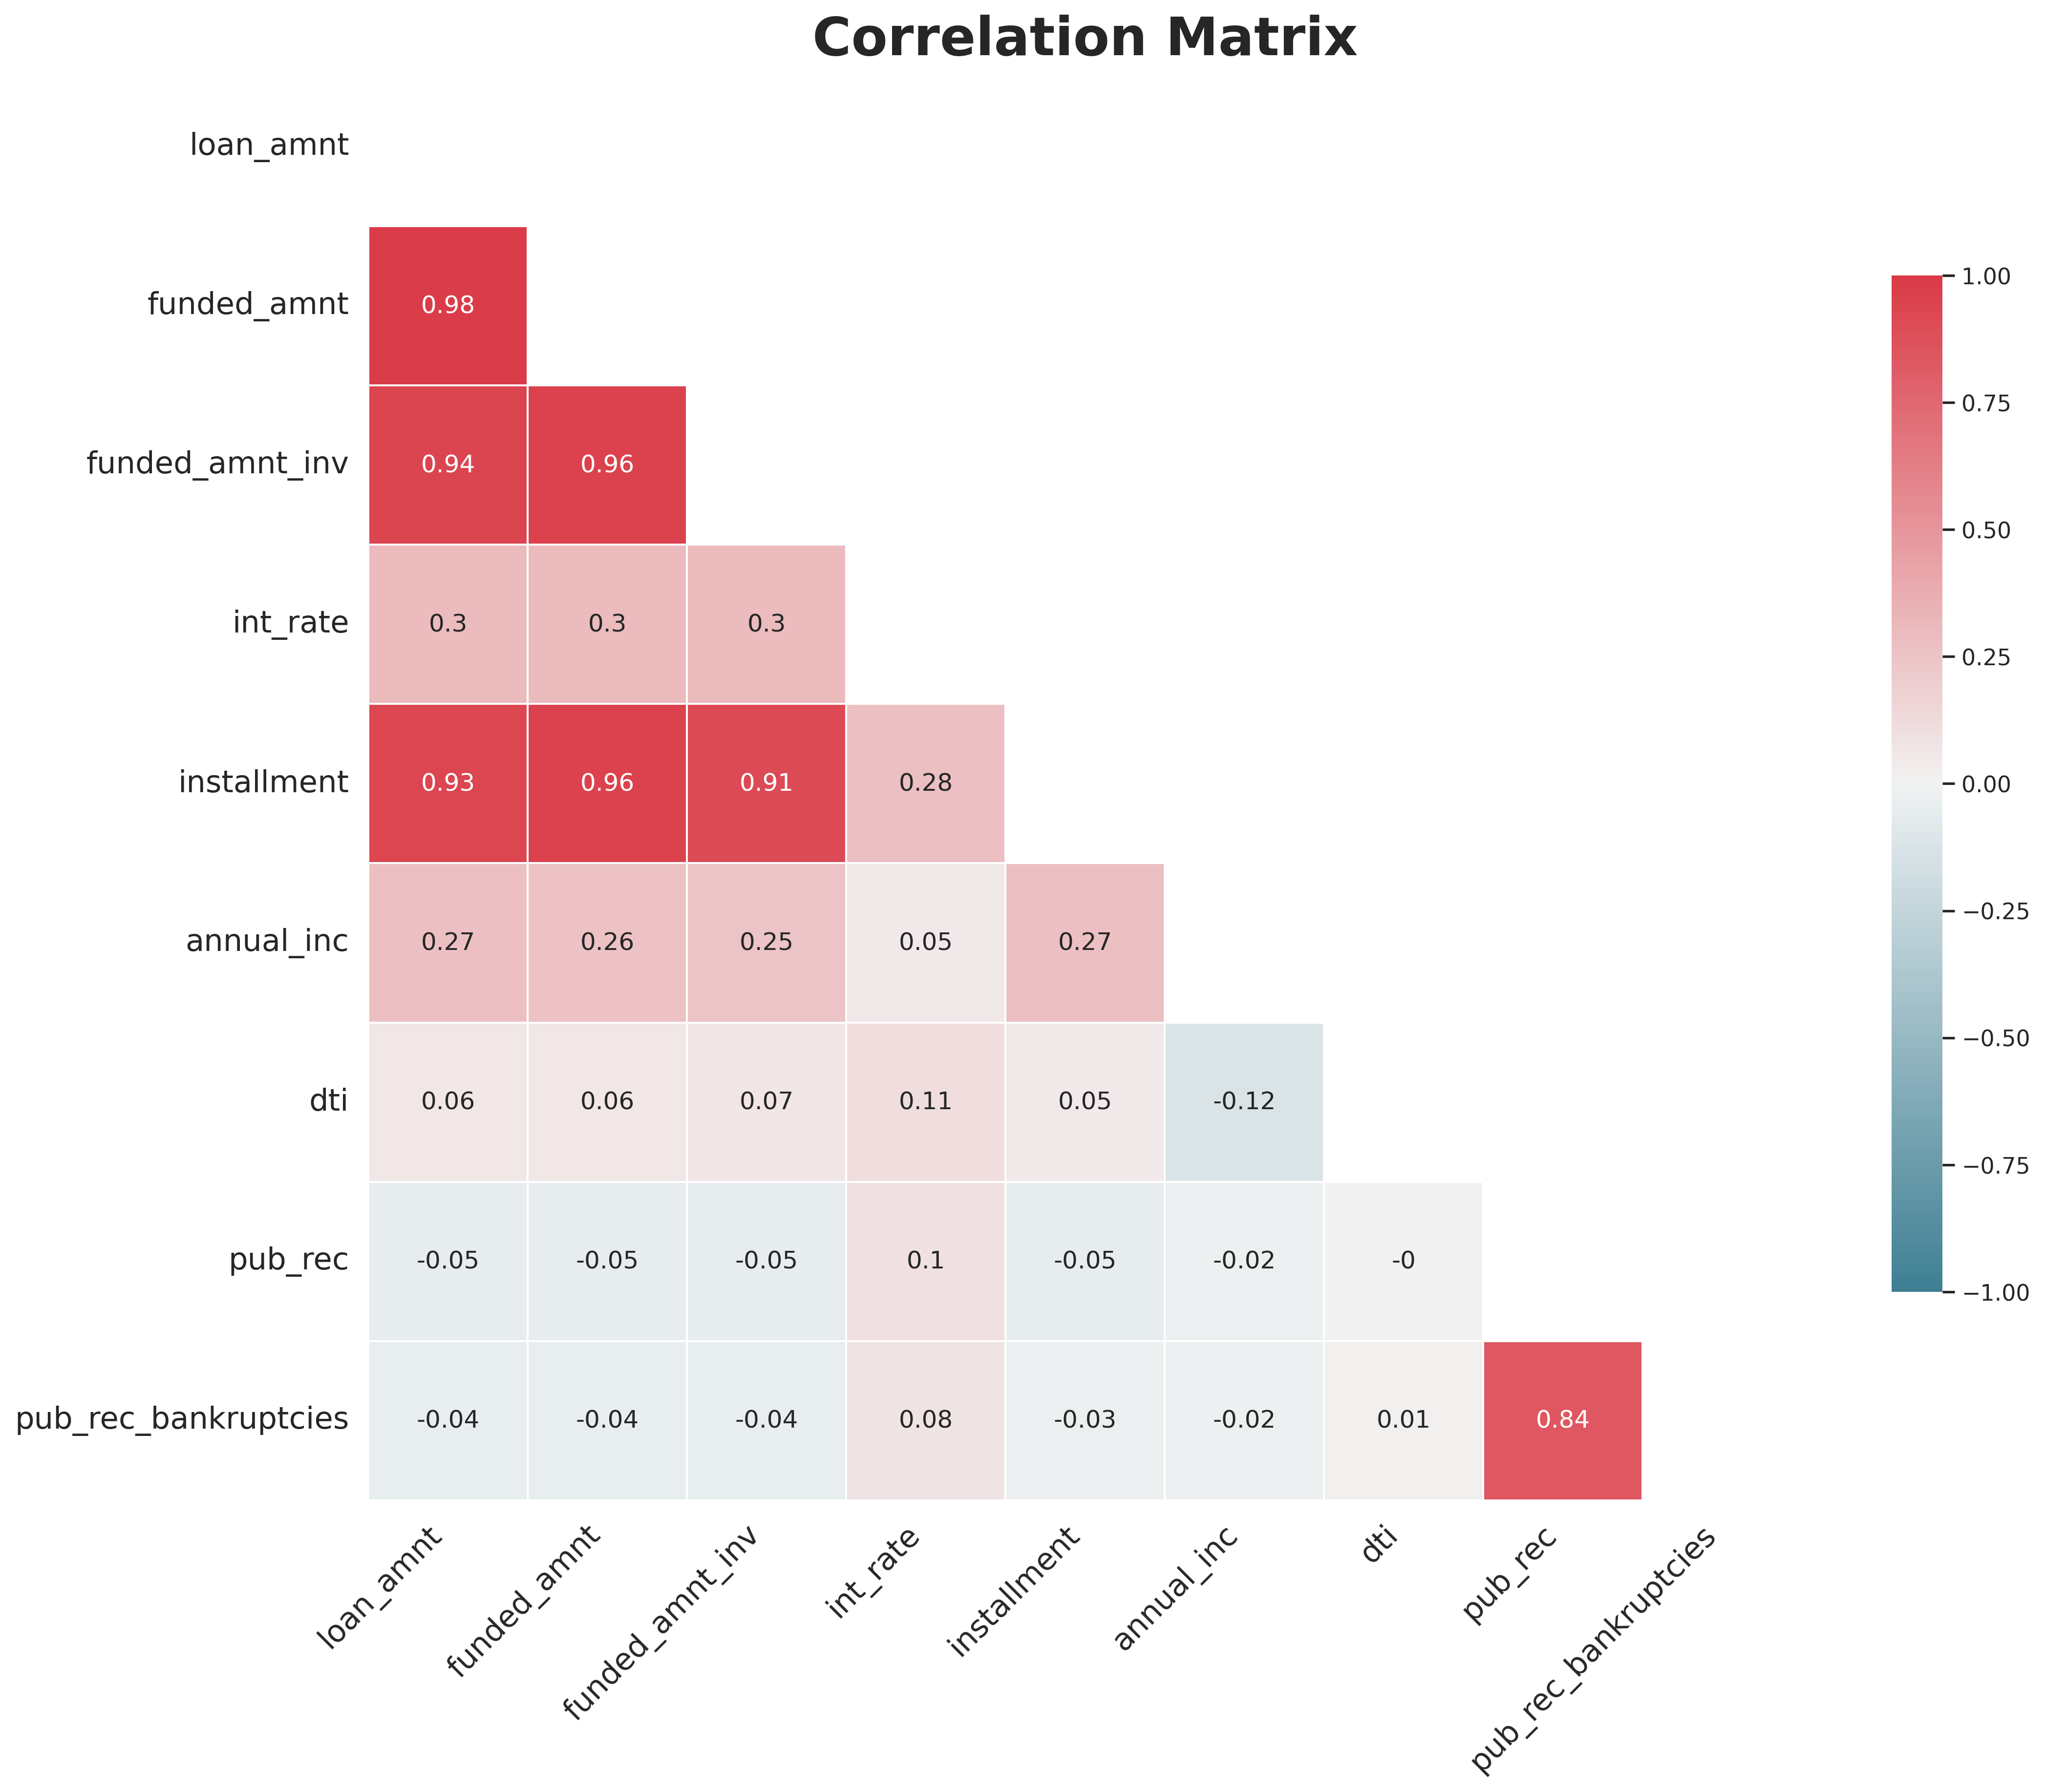

In [ ]:
##Bivariate Analyis - Understanding the correlation of continuous variables
sns.set(style='white')
plt.figure (figsize=(20,20), dpi=300)
df_corr_plot1= loan_file_path.copy()
#Recall 'col_list_cont: list of columns containing continuous variables'
df_corr_plot1 = df_corr_plot1.loc[:,col_list_cont]
correlation_matrix1 = round(df_corr_plot1.corr(),2)
correlation_matrix1
mask = np.triu(np.ones_like(correlation_matrix1, dtype=np.bool))
f, ax = plt.subplots(figsize=(15, 15), dpi=300)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(correlation_matrix1, mask=mask, cmap=cmap, vmin= -1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Correlation Matrix', fontsize=26, fontweight='bold')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.autoscale()
plt.tight_layout()
plt.show()

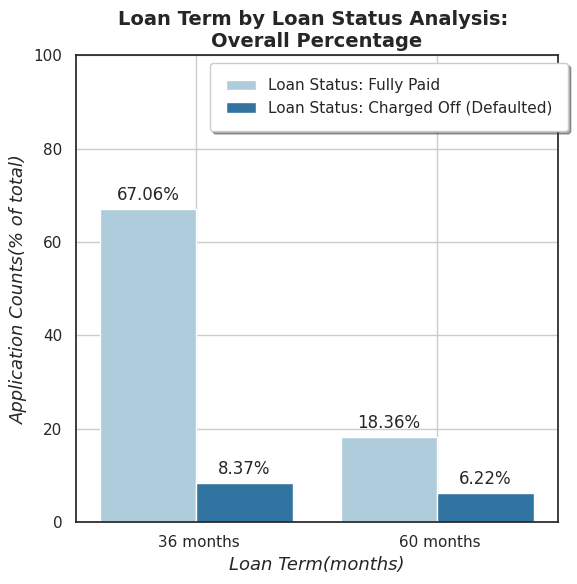

In [ ]:
#Analysing applicant's loan term variable 'term' as per 'loan_status'
plt.figure(figsize=(6,6),dpi = 100)
br = pd.DataFrame(100*loan_file_path.groupby(['term','loan_status'])['id'].count()/len(loan_file_path))
br.reset_index(inplace=True)
br=br.rename(columns={'id':'Percentage'})

ax_123 = sns.barplot(x='term',y='Percentage', hue = 'loan_status',data=br, palette=("Paired"))

plt.xlabel('Loan Term(months)', fontsize= 13, fontstyle='italic')
plt.ylabel('Application Counts(% of total)', fontsize= 13, fontstyle='italic')
plt.title('Loan Term by Loan Status Analysis: \nOverall Percentage', fontsize=14,fontweight='bold')
plt.ylim(0,100)

for p in ax_123.patches:
    ax_123.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.\
                                                    , p.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points')

#Legend
T1= ax_123.legend(loc='upper center', bbox_to_anchor=(0.65, 1.00), fancybox=True, framealpha=1, shadow=True, borderpad=1)
T1.get_texts()[0].set_text('Loan Status: Fully Paid')
T1.get_texts()[1].set_text('Loan Status: Charged Off (Defaulted)')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Observation:** The above plot gives us an insight that most of the defaulters(8.37%) belonged to the '36 months' loan term category.

## **Relationship:**  Average Interest Rate vs Grade**

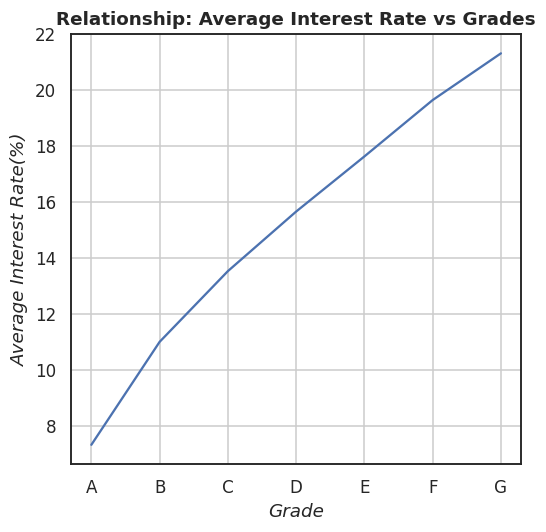

In [ ]:
#Average Interest Rate by Grades
sns.set(style='white')
plt.figure(figsize=(5,5), dpi=110)
loan_file_path.groupby(['grade']).int_rate.mean().plot.line()
plt.xlabel('Grade', fontsize=12,fontstyle='italic')
plt.ylabel('Average Interest Rate(%)', fontsize=12,fontstyle='italic')
plt.title('Relationship: Average Interest Rate vs Grades', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.autoscale()
plt.grid(True)
plt.show()

# **Observation:**The average interest rate of approved loan applicants increases as the grade moves from A to G. Thus, indicating that Grade 'A' applicants are the most credible ones and Grade 'G' are the least. This relationship is a strong indicator of high risk and volatility, as we move from Grade 'A' to 'G'.

# **Defaulter Rate(%) as per 'Grade' and Loan Status Analysis**

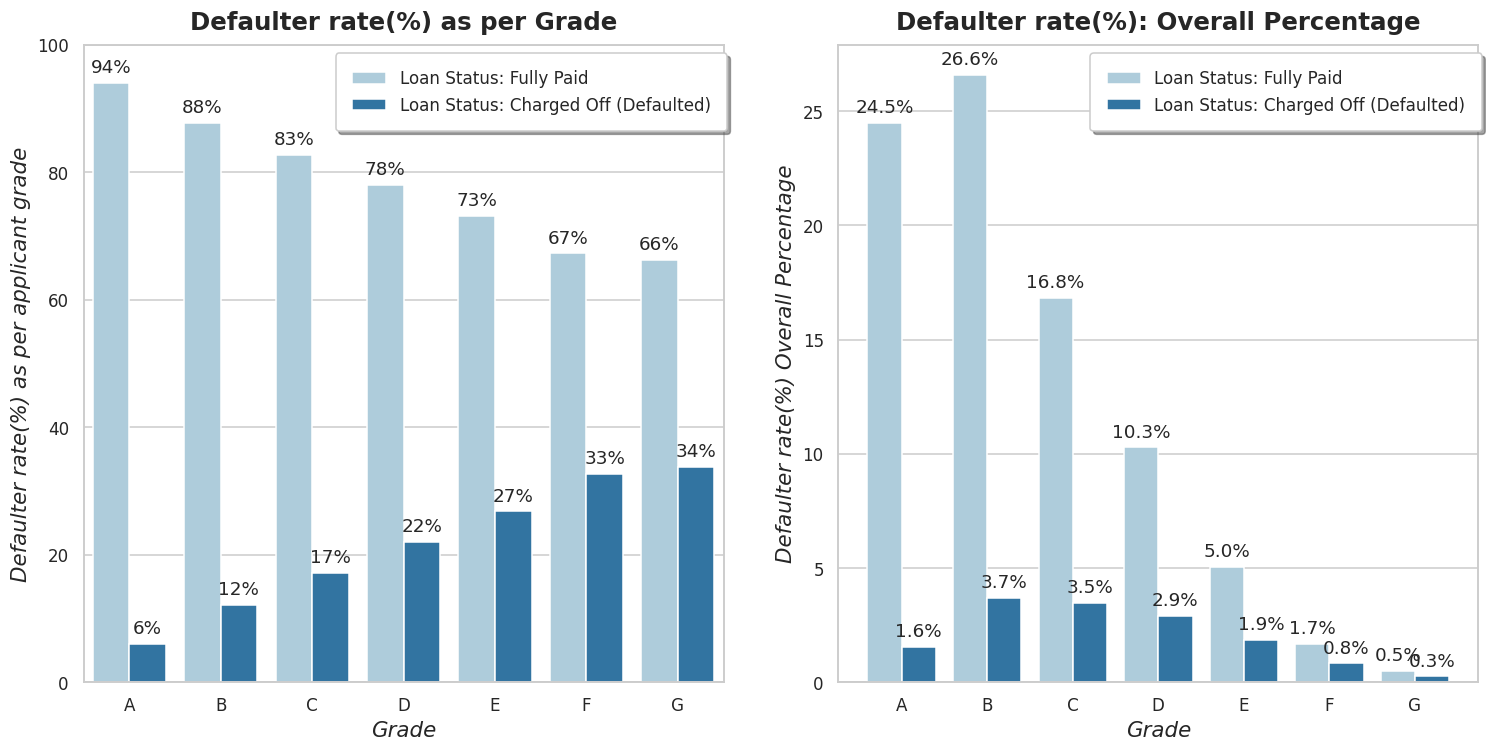

In [ ]:
##Defaulter Rate(%) as per 'grade' analysis. Finding the defaulter rate (%) using 'grade' and 'loan_status' variables.
grade_ls = loan_file_path.loc[:,['grade','loan_status']]
grade_ls_gpby = grade_ls.groupby(['grade','loan_status']).size().to_frame('c_gls')
grade_ls_gpby.reset_index(inplace=True)
grade_ls_gpby['pct_count_gwise']= ""
grade_ls_gpby['c_gls'] = grade_ls_gpby['c_gls'].astype('int')


A = grade_ls_gpby[grade_ls_gpby.grade=='A']
A.pct_count_gwise = round(100*A['c_gls']/A['c_gls'].sum(),2)
B = grade_ls_gpby[grade_ls_gpby.grade=='B']
B.pct_count_gwise = round(100*B['c_gls']/B['c_gls'].sum(),2)
C = grade_ls_gpby[grade_ls_gpby.grade=='C']
C.pct_count_gwise = round(100*C['c_gls']/C['c_gls'].sum(),2)
D = grade_ls_gpby[grade_ls_gpby.grade=='D']
D.pct_count_gwise = round(100*D['c_gls']/D['c_gls'].sum(),2)
E = grade_ls_gpby[grade_ls_gpby.grade=='E']
E.pct_count_gwise = round(100*E['c_gls']/E['c_gls'].sum(),2)
F = grade_ls_gpby[grade_ls_gpby.grade=='F']
F.pct_count_gwise = round(100*F['c_gls']/F['c_gls'].sum(),2)
G = grade_ls_gpby[grade_ls_gpby.grade=='G']
G.pct_count_gwise = round(100*G['c_gls']/G['c_gls'].sum(),2)

grade_ls_final = pd.concat([A,B,C,D,E,F,G])
#plot
sns.set(style='whitegrid')
plt.figure(figsize=(14,7), dpi=110)

#subplot 1
plt.subplot(121)
ax_G = sns.barplot(x=grade_ls_final.grade, y=grade_ls_final.pct_count_gwise, hue=grade_ls_final.loan_status, palette='Paired')
plt.xlabel('Grade', fontsize= 14, fontstyle='italic')
plt.ylabel('Defaulter rate(%) as per applicant grade', fontsize= 14, fontstyle='italic')
plt.ylim(0,100)
plt.title('Defaulter rate(%) as per Grade',fontsize= 16, fontweight='bold', pad=10)
#Legend
A= ax_G.legend(loc='upper center', bbox_to_anchor=(0.70, 1.00), fancybox=True, framealpha=1, shadow=True, borderpad=1)
A.get_texts()[0].set_text('Loan Status: Fully Paid')
A.get_texts()[1].set_text('Loan Status: Charged Off (Defaulted)')

#Display values
for p in ax_G.patches:
    ax_G.annotate(format(p.get_height(), '.0f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), textcoords = 'offset points')

#subplot 2
plt.subplot(122)
grade_ls_final['pct_count_of_total']= round(100*grade_ls_final['c_gls']/grade_ls_final['c_gls'].sum(),2)

ax_T = sns.barplot(x=grade_ls_final.grade, y=grade_ls_final.pct_count_of_total, hue=grade_ls_final.loan_status, palette='Paired')
plt.xlabel('Grade', fontsize= 14, fontstyle='italic')
plt.ylabel('Defaulter rate(%) Overall Percentage', fontsize= 14, fontstyle='italic')
plt.title('Defaulter rate(%): Overall Percentage',fontsize= 16, fontweight='bold', pad=10)
#Legend
T= ax_T.legend(loc='upper center', bbox_to_anchor=(0.70, 1.00), fancybox=True, framealpha=1, shadow=True, borderpad=1)
T.get_texts()[0].set_text('Loan Status: Fully Paid')
T.get_texts()[1].set_text('Loan Status: Charged Off (Defaulted)')

#Display values
for p in ax_T.patches:
    ax_T.annotate(format(p.get_height(), '.1f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), fontsize=12, textcoords = 'offset points')

plt.tight_layout()
plt.autoscale()
plt.show()

# **Observations**:
**(i)** (From left graph): The percentage of defaulters is significantly high within the categories, 'F' and 'G'. LC should be more vigilant while approving loan applications for high risk applicants.(Grade'A'->Credible applicants, Grade 'G'->Least Credible applicants)

**(ii)**(From the overall percentage graph) largest % of approved loan defaulters belong to Grade 'B'(3.7%) and 'C'(3.5%) category.

**Defaulter Rate(%) by 'Employment Length' and 'Loan Status' Analysis**

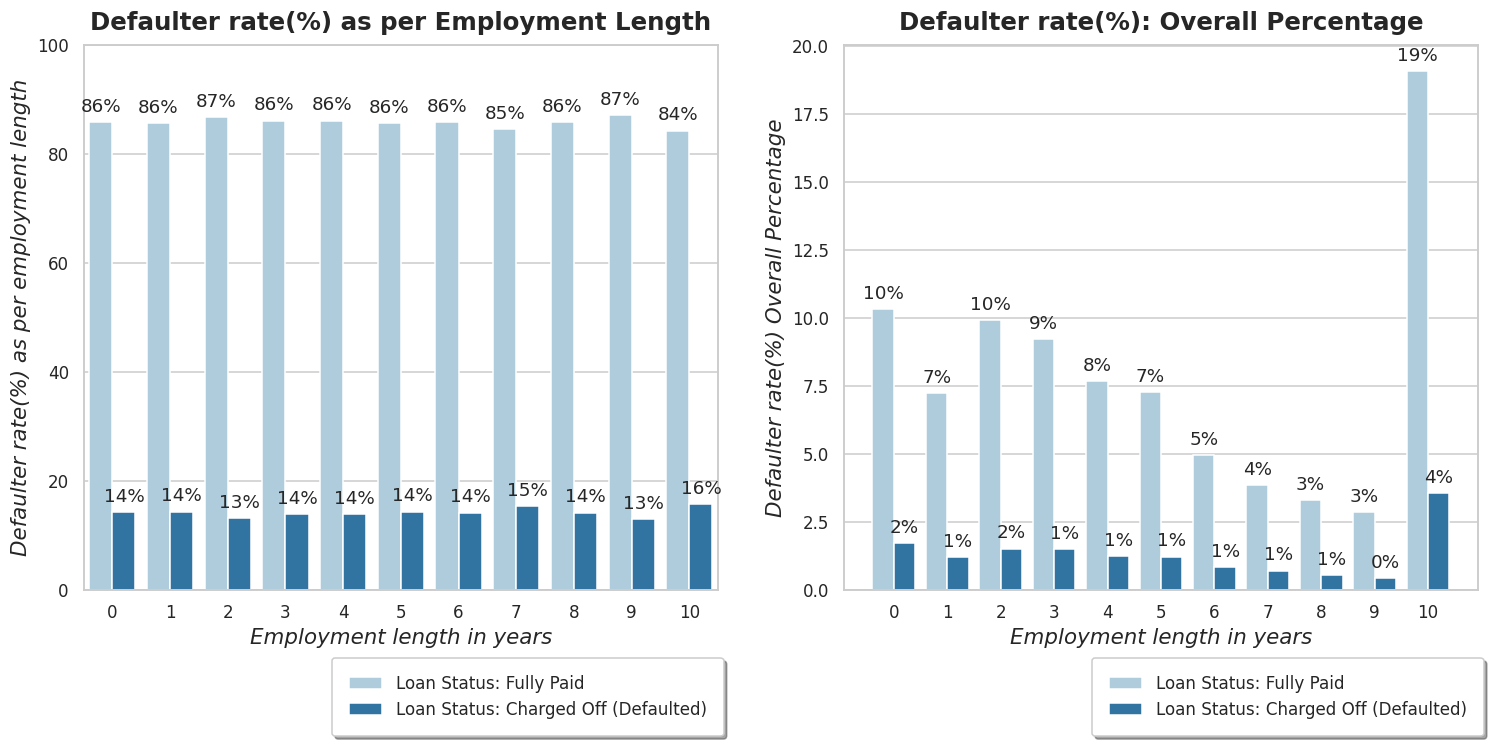

In [ ]:
#Employment length and loan status anlaysis. Finding the defaulter rate (%) using 'emp_length' and 'loan_status' variables.
empl_ls = loan_file_path.loc[:,['emp_length','loan_status']]
#Retaining only the values known
empl_ls = empl_ls[~(empl_ls.emp_length=='undisclosed')]
empl_ls_gpby = empl_ls.groupby(['emp_length','loan_status']).size().to_frame('c_els')
empl_ls_gpby.reset_index(inplace=True)
empl_ls_gpby['pct_count_lwise']= ""
empl_ls_gpby['c_els'] = empl_ls_gpby['c_els'].astype('int')

E0 = empl_ls_gpby[empl_ls_gpby.emp_length=='0']
E0.pct_count_lwise = round(100*E0['c_els']/E0['c_els'].sum(),2)
E1 = empl_ls_gpby[empl_ls_gpby.emp_length=='1']
E1.pct_count_lwise = round(100*E1['c_els']/E1['c_els'].sum(),2)
E2 = empl_ls_gpby[empl_ls_gpby.emp_length=='2']
E2.pct_count_lwise = round(100*E2['c_els']/E2['c_els'].sum(),2)
E3 = empl_ls_gpby[empl_ls_gpby.emp_length=='3']
E3.pct_count_lwise = round(100*E3['c_els']/E3['c_els'].sum(),2)
E4 = empl_ls_gpby[empl_ls_gpby.emp_length=='4']
E4.pct_count_lwise = round(100*E4['c_els']/E4['c_els'].sum(),2)
E5 = empl_ls_gpby[empl_ls_gpby.emp_length=='5']
E5.pct_count_lwise = round(100*E5['c_els']/E5['c_els'].sum(),2)
E6 = empl_ls_gpby[empl_ls_gpby.emp_length=='6']
E6.pct_count_lwise = round(100*E6['c_els']/E6['c_els'].sum(),2)
E7 = empl_ls_gpby[empl_ls_gpby.emp_length=='7']
E7.pct_count_lwise = round(100*E7['c_els']/E7['c_els'].sum(),2)
E8 = empl_ls_gpby[empl_ls_gpby.emp_length=='8']
E8.pct_count_lwise = round(100*E8['c_els']/E8['c_els'].sum(),2)
E9 = empl_ls_gpby[empl_ls_gpby.emp_length=='9']
E9.pct_count_lwise = round(100*E9['c_els']/E9['c_els'].sum(),2)
E10 = empl_ls_gpby[empl_ls_gpby.emp_length=='10']
E10.pct_count_lwise = round(100*E10['c_els']/E10['c_els'].sum(),2)

empl_ls_final =pd.concat([E0,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10])
empl_ls_final

#plot
sns.set(style='whitegrid')
plt.figure(figsize=(14,7), dpi=110)

#subplot 1
plt.subplot(121)
ax_G = sns.barplot(x=empl_ls_final.emp_length, y=empl_ls_final.pct_count_lwise, hue=empl_ls_final.loan_status, palette='Paired')
plt.xlabel('Employment length in years', fontsize= 14, fontstyle='italic')
plt.ylabel('Defaulter rate(%) as per employment length', fontsize= 14, fontstyle='italic')
plt.ylim(0,100)
plt.title('Defaulter rate(%) as per Employment Length',fontsize= 16, fontweight='bold', pad=10)
#Legend
A= ax_G.legend(loc='upper center', bbox_to_anchor=(0.70,-0.11), fancybox=True, framealpha=1, shadow=True, borderpad=1)
A.get_texts()[0].set_text('Loan Status: Fully Paid')
A.get_texts()[1].set_text('Loan Status: Charged Off (Defaulted)')

#Display values
for p in ax_G.patches:
    ax_G.annotate(format(p.get_height(), '.0f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), textcoords = 'offset points')

#subplot 2
plt.subplot(122)
empl_ls_final['pct_count_of_total']= round(100*empl_ls_final['c_els']/empl_ls_final['c_els'].sum(),2)

ax_F = sns.barplot(x=empl_ls_final.emp_length, y=empl_ls_final.pct_count_of_total, hue=empl_ls_final.loan_status, palette='Paired')
plt.xlabel('Employment length in years', fontsize= 14, fontstyle='italic')
plt.ylabel('Defaulter rate(%) Overall Percentage', fontsize= 14, fontstyle='italic')
plt.ylim(0,100)
plt.title('Defaulter rate(%): Overall Percentage',fontsize= 16, fontweight='bold', pad=10)
#Legend
M= ax_F.legend(loc='upper center', bbox_to_anchor=(0.70,-0.11), fancybox=True, framealpha=1, shadow=True, borderpad=1)
M.get_texts()[0].set_text('Loan Status: Fully Paid')
M.get_texts()[1].set_text('Loan Status: Charged Off (Defaulted)')

#Display values
for p in ax_F.patches:
    ax_F.annotate(format(p.get_height(), '.0f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.tight_layout()
plt.autoscale()
plt.show()

# **Observation:** Considering the overall percentage graph, the maximum percentage of defaulters are found in the 10 years(4%) employment year category. After it, we see applicants with less years of experience i.e. around 0 to 2 years, following the trend.

# **Rate(%):** Home Ownership Status (Among Defaulters) Analysis

In [ ]:
##Home Ownership Status and Loan Status analysis. Finding the defaulters(%) according to 'home_ownership' variable. (loan status->charged off i.e. '1')
home = loan_file_path.loc[:,['home_ownership','loan_status']]
#Considering only the defaulters (charged off='1')
home = home[home.loan_status=='1']
#Check for unique entries in 'home_ownership' column
home.home_ownership.unique()

array(['rent', 'own', 'mortgage', 'other'], dtype=object)

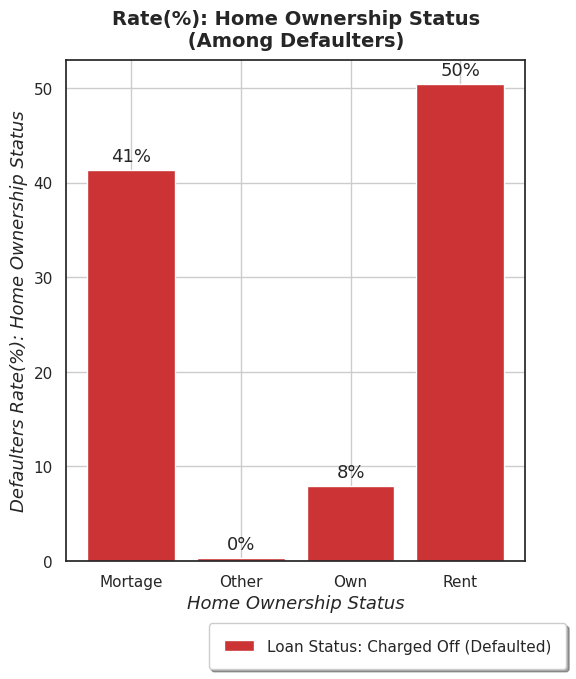

In [ ]:
##Retaining the known values only
home_ls_final = home.groupby(['home_ownership','loan_status']).size().to_frame('c_hls')
home_ls_final.reset_index(inplace=True)
home_ls_final['c_hls'] = home_ls_final['c_hls'].astype('int')
home_ls_final

#Plot
sns.set(style='white')
plt.figure(figsize=(6,7), dpi=100)

home_ls_final['pct_count_of_total']= round(100*home_ls_final['c_hls']/home_ls_final['c_hls'].sum(),2)

ax_K1 = sns.barplot(x=home_ls_final.home_ownership, y=home_ls_final.pct_count_of_total, hue=home_ls_final.loan_status, palette='Set1')
plt.xlabel('Home Ownership Status', fontsize= 13, fontstyle='italic')
plt.ylabel('Defaulters Rate(%): Home Ownership Status', fontsize= 13, fontstyle='italic')
plt.title('Rate(%): Home Ownership Status\n (Among Defaulters) ',fontsize= 14, fontweight='bold', pad=10)
plt.ylim(0,100)
#Legend
L1= ax_K1.legend(loc='upper center', bbox_to_anchor=(0.70,-0.11), fancybox=True, framealpha=1, shadow=True, borderpad=1)
L1.get_texts()[0].set_text('Loan Status: Charged Off (Defaulted)')

#Display values
for p in ax_K1.patches:
    ax_K1.annotate(format(p.get_height(), '.0f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), fontsize=13, textcoords = 'offset points')
plt.xticks([0,1,2,3],['Mortage','Other','Own','Rent'])
plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()

# **Observation:** Among the defaulters, most percentage of defaulters fall under 'Rent'(50%) category of 'Home Ownership Status', followed by 'Mortgage'(41%).

# **Rate(%) Verification Status (Among Defaulters)**

In [ ]:
#Check unique items in 'verification_status' column
loan_file_path.verification_status.unique()

array(['verified', 'source verified', 'not verified'], dtype=object)

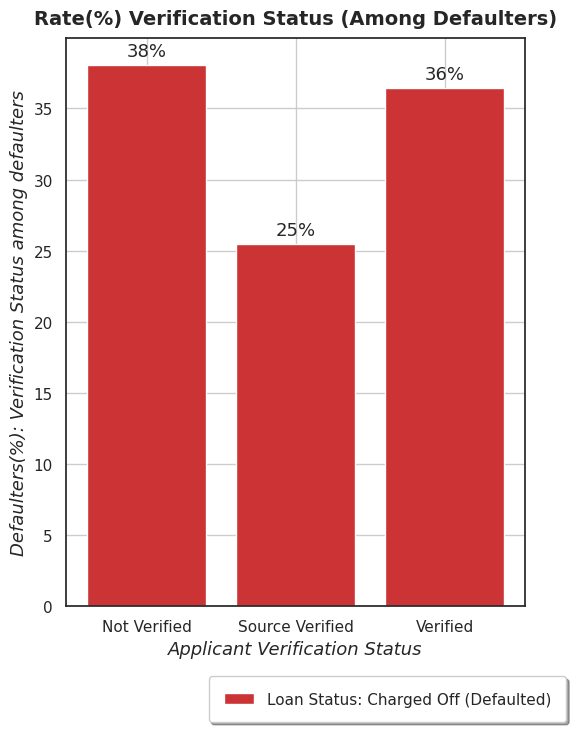

In [ ]:
##Finding the defaulters(%) according to 'verification_status' variable. (loan status->charged off i.e. '1')
verf_1 = loan_file_path.loc[:,['verification_status','loan_status']]
#Considering only the defaulters (charged off='1')
verf_1 = verf_1[verf_1.loan_status=='1']
#Retaining only the values known
verf_1_final = verf_1.groupby(['verification_status','loan_status']).size().to_frame('c_vls')
verf_1_final.reset_index(inplace=True)
verf_1_final['c_vls'] = verf_1_final['c_vls'].astype('int')
verf_1_final

#Plot
sns.set(style='white')
plt.figure(figsize=(6,7.5), dpi=100)

verf_1_final['pct_count_of_total']= round(100*verf_1_final['c_vls']/verf_1_final['c_vls'].sum(),2)

ax_K2 = sns.barplot(x=verf_1_final.verification_status, y=verf_1_final.pct_count_of_total, hue=verf_1_final.loan_status, palette='Set1')
plt.xlabel('Applicant Verification Status', fontsize= 13, fontstyle='italic')
plt.ylabel('Defaulters(%): Verification Status among defaulters', fontsize= 13, fontstyle='italic')
plt.ylim(0,100)
plt.title('Rate(%) Verification Status (Among Defaulters)',fontsize= 14, fontweight='bold', pad=10)
#Legend
L2= ax_K2.legend(loc='upper center', bbox_to_anchor=(0.70,-0.11), fancybox=True, framealpha=1, shadow=True, borderpad=1)
L2.get_texts()[0].set_text('Loan Status: Charged Off (Defaulted)')

#Display values
for p in ax_K2.patches:
    ax_K2.annotate(format(p.get_height(), '.0f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), fontsize=13, textcoords = 'offset points')
plt.xticks([0,1,2],['Not Verified','Source Verified','Verified'])
plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()

# **Observation:** Among the defaulters, maximum number (38%) of the loan applicants are 'Not Verified'. Hence, Lending Club (LC) should make the norms stringent on 'Verification' aspect of the candidate's reported annual income.

# **Defaulters Rate(%) analysis based on Loan Amount**

In [ ]:
##Defaulters Rate(%) analysis on the basis of loan amount.
loan_file_path.loan_amnt.describe()

count    38566.000000
mean     11047.429083
std       7348.566643
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

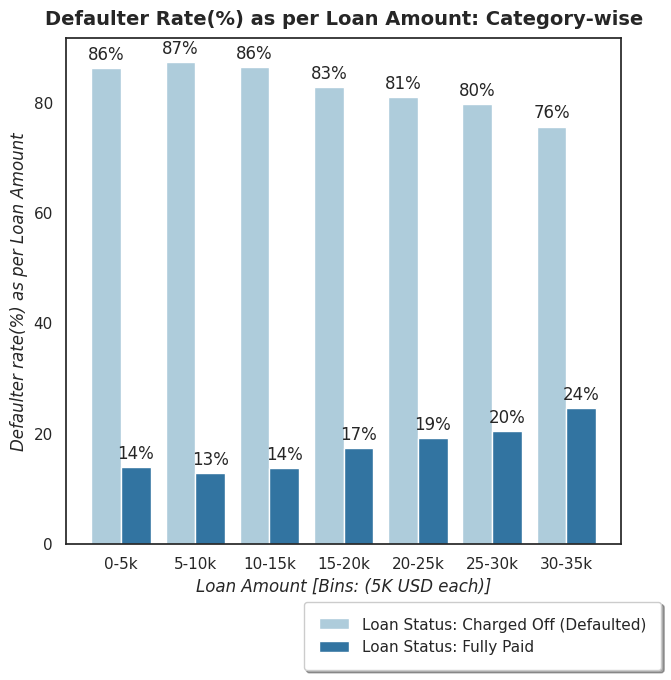

In [ ]:
##Creating bins for  loan amount per the information above
loan_file_path['loan_amnt_bin'] = pd.cut(loan_file_path['loan_amnt'], [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])
loan_amnt_gby = loan_file_path.groupby(['loan_amnt_bin','loan_status']).size().to_frame('c_gls')
loan_amnt_gby.reset_index(inplace=True)
loan_amnt_gby

loan_amnt_gby['c_gls'] = loan_amnt_gby['c_gls'].astype('int')


bin1  = loan_amnt_gby[loan_amnt_gby.loan_amnt_bin=='0-5k']
bin1['pct_count_gwise'] =   round(100*bin1['c_gls']/bin1['c_gls'].sum(),2)

bin2  = loan_amnt_gby[loan_amnt_gby.loan_amnt_bin=='5-10k']
bin2['pct_count_gwise'] =   round(100*bin2['c_gls']/bin2['c_gls'].sum(),2)

bin3  = loan_amnt_gby[loan_amnt_gby.loan_amnt_bin=='10-15k']
bin3['pct_count_gwise'] =   round(100*bin3['c_gls']/bin3['c_gls'].sum(),2)

bin4  = loan_amnt_gby[loan_amnt_gby.loan_amnt_bin=='15-20k']
bin4['pct_count_gwise'] =   round(100*bin4['c_gls']/bin4['c_gls'].sum(),2)

bin5  = loan_amnt_gby[loan_amnt_gby.loan_amnt_bin=='20-25k']
bin5['pct_count_gwise'] =   round(100*bin5['c_gls']/bin5['c_gls'].sum(),2)

bin6  = loan_amnt_gby[loan_amnt_gby.loan_amnt_bin=='25-30k']
bin6['pct_count_gwise'] =   round(100*bin6['c_gls']/bin6['c_gls'].sum(),2)

bin7  = loan_amnt_gby[loan_amnt_gby.loan_amnt_bin=='30-35k']
bin7['pct_count_gwise'] =   round(100*bin7['c_gls']/bin7['c_gls'].sum(),2)

loan_amnt_ls_final = pd.concat([bin1,bin2,bin3,bin4,bin5,bin6,bin7])

sns.set(style='white')
plt.figure(figsize=(7,7), dpi=100)

ax_ln = sns.barplot(x='loan_amnt_bin',y='pct_count_gwise', hue = 'loan_status',data=loan_amnt_ls_final, palette=('Paired'))
plt.xlabel('Loan Amount [Bins: (5K USD each)]', fontsize= 12, fontstyle='italic')
plt.ylabel('Defaulter rate(%) as per Loan Amount', fontsize= 12, fontstyle='italic')
plt.ylim(0,100)
plt.title('Defaulter Rate(%) as per Loan Amount: Category-wise',fontsize= 14, fontweight='bold', pad=10)
#Legend
A= ax_ln.legend(loc='upper center', bbox_to_anchor=(0.75,-0.1), fancybox=True, framealpha=1, shadow=True, borderpad=1)
A.get_texts()[0].set_text('Loan Status: Charged Off (Defaulted)')
A.get_texts()[1].set_text('Loan Status: Fully Paid')
#Display values
for p in ax_ln.patches:
    ax_ln.annotate(format(p.get_height(), '.0f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.tight_layout()
plt.autoscale()
plt.show()

# **Observation:** Default rate(%) increases as the requested loan amount increases.

# **Defaulters Rate(%) analysis based on Annual Income of approved Loan Applicants**

In [ ]:
##Annual Income and Defaulters rate(%) analysis
round(loan_file_path.annual_inc.describe(),2)

count      38566.00
mean       68782.16
std        64226.31
min         4000.00
25%        40000.00
50%        58876.00
75%        82000.00
max      6000000.00
Name: annual_inc, dtype: float64

**Since the applicant's annual income is highly skewed, we are checking the below percentile values to bin the applicants into low, medium, high and very high income categories respectively.**

In [ ]:
loan_file_path.annual_inc.quantile([.1, .2,.3,.4 ,.5 ,.6 ,.7,.8,.9,.95,.98,1])

0.10      30000.00
0.20      37200.00
0.30      44515.88
0.40      50004.00
0.50      58876.00
0.60      65004.00
0.70      75000.00
0.80      90000.00
0.90     115000.00
0.95     140004.00
0.98     187000.00
1.00    6000000.00
Name: annual_inc, dtype: float64

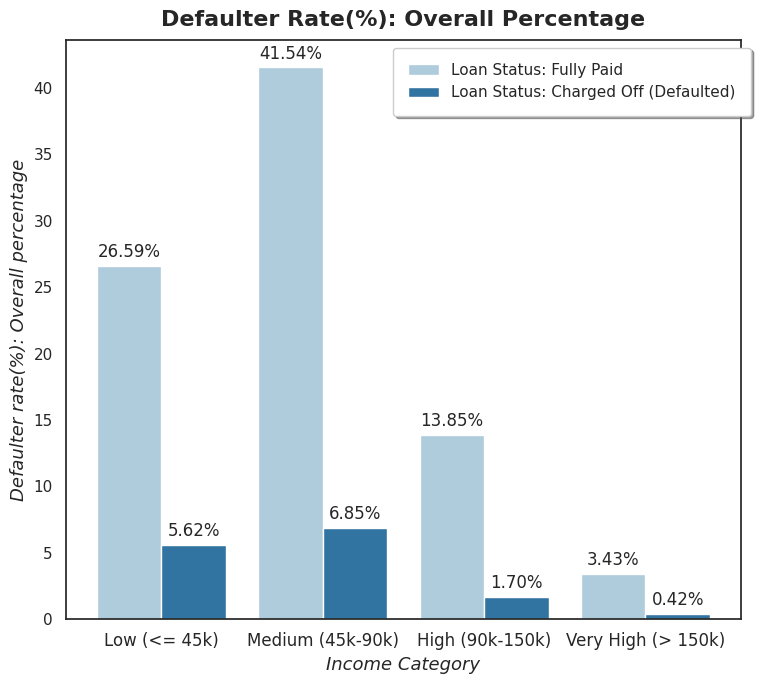

In [ ]:
##Lets try and find out if we can find any inference between income and loan staus after binning the income

def bin_annual_income (n):
    if n <= 45000:
        return 'low'
    elif n > 45000 and n <=90000:
        return 'medium'
    elif n > 90000 and n <=150000:
        return 'high'
    else:
        return 'very high'


loan_file_path['annual_inc_bin'] = loan_file_path['annual_inc'].apply(lambda x: bin_annual_income(x))


annual_inc_gby = loan_file_path.groupby(['annual_inc_bin','loan_status']).size().to_frame('c_gls')
annual_inc_gby.reset_index(inplace=True)
annual_inc_gby['c_gls'] = annual_inc_gby['c_gls'].astype('int')
annual_inc_gby


binl  = annual_inc_gby[annual_inc_gby.annual_inc_bin =='low']
binl['pct_count_gwise'] =   round(100*binl['c_gls']/binl['c_gls'].sum(),2)

binm  = annual_inc_gby[annual_inc_gby.annual_inc_bin =='medium']
binm['pct_count_gwise'] =   round(100*binm['c_gls']/binm['c_gls'].sum(),2)


binh  = annual_inc_gby[annual_inc_gby.annual_inc_bin =='high']
binh['pct_count_gwise'] =   round(100*binh['c_gls']/binh['c_gls'].sum(),2)



binvh  = annual_inc_gby[annual_inc_gby.annual_inc_bin =='very high']
binvh['pct_count_gwise'] =   round(100*binvh['c_gls']/binvh['c_gls'].sum(),2)


annual_inc_gby_final = pd.concat([binl,binm,binh,binvh])


annual_inc_gby_final['pct_count_of_total']= round(100*annual_inc_gby_final['c_gls']/annual_inc_gby_final['c_gls'].sum(),2)


sns.set(style='white')
plt.figure(figsize=(8,7), dpi=100)

#Plot
ax_ln2 = sns.barplot(x=annual_inc_gby_final.annual_inc_bin, y=annual_inc_gby_final.pct_count_of_total
                     , hue=annual_inc_gby_final.loan_status
                   , palette='Paired')
plt.xlabel('Income Category', fontsize= 13, fontstyle='italic')
plt.ylabel('Defaulter rate(%): Overall percentage', fontsize= 13, fontstyle='italic')
plt.ylim(0,100)
plt.title('Defaulter Rate(%): Overall Percentage',fontsize= 16, fontweight='bold', pad=10)
#Legend
T= ax_ln2.legend(loc='upper center', bbox_to_anchor=(0.75, 1.00), fancybox=True, framealpha=1, shadow=True, borderpad=1)
T.get_texts()[0].set_text('Loan Status: Fully Paid')
T.get_texts()[1].set_text('Loan Status: Charged Off (Defaulted)')
plt.xticks([0,1,2,3],['Low (<= 45k)','Medium (45k-90k)','High (90k-150k)','Very High (> 150k)'], fontsize=12)
for p in ax_ln2.patches:
    ax_ln2.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.tight_layout()
plt.autoscale()
plt.show()

##  **Observation:** From the overall percentage plot, we see loan applicants from 'Low'(<=45K USD) and 'Medium'(45K-90K USD) income group have a greater share of defaulted loans

# **Average Interest Rate by Loan Term Analysis (Among Defaulters)**

In [ ]:
##Average Interest Rate vs Loan Term analysis
#Considering only defaulters
trm_df = loan_file_path[loan_file_path.loan_status=='1']
trm_grpby = trm_df.groupby('term')['int_rate'].mean().reset_index()

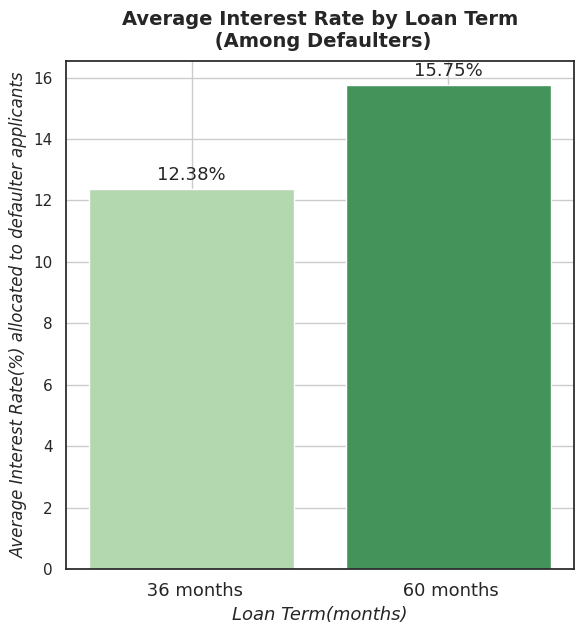

In [ ]:
sns.set(style='white')
plt.figure(figsize=(6,6.5), dpi=100)
ax_trm = sns.barplot(x='term',y='int_rate', data=trm_grpby, palette=('Greens'))


plt.xlabel('Loan Term(months)', fontsize= 13, fontstyle='italic')
plt.ylabel('Average Interest Rate(%) allocated to defaulter applicants', fontsize= 12, fontstyle='italic')
plt.title("Average Interest Rate by Loan Term\n (Among Defaulters)", fontsize=14,fontweight='bold', pad=10)
plt.xticks(fontsize=13)
for p in ax_trm.patches:
    ax_trm.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.\
                                                        , p.get_height()), ha = 'center'\
                    , va = 'center', xytext = (0, 10), fontsize=13, textcoords = 'offset points')

plt.tight_layout()
plt.grid(True)
plt.autoscale()
plt.show()

# **Observation:** Among the defaulters, the highest average interest rate(15.75%) belonged to '60 months' category.

# **Address State Analysis(% wise) of Defaulters**

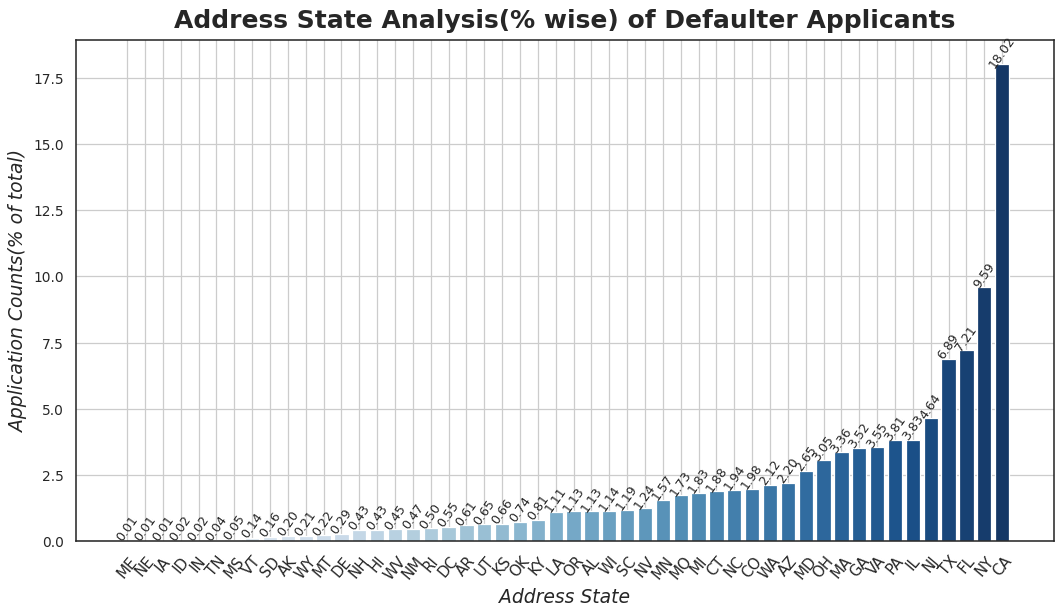

In [ ]:
##Address State Analysis(% wise) of Defaulter Applicants
sns.set(style='white')
plt.figure(figsize=(12, 7),dpi = 90)

#Only defaulters
df_ad = loan_file_path[(loan_file_path.loan_status=='1')]
ad1 = pd.DataFrame(df_ad.addr_state.value_counts(normalize=True).mul(100).round(2).sort_values().to_frame('pct_count'))
ad1.reset_index(inplace=True)
ad1['states'] = ad1['index']

ax_08 = sns.barplot(x='index',y='pct_count', data=ad, palette='Blues')
#ax_08.set_xticklabels(labels=list(ad1.index), fontsize=14)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Address State', fontsize= 15, fontstyle='italic')
plt.ylabel('Application Counts(% of total)', fontsize= 15, fontstyle='italic')
plt.title('Address State Analysis(% wise) of Defaulter Applicants', fontsize= 20, fontweight='bold', pad=10)
plt.ylim(0,100)

for p in ax_08.patches:
    ax_08.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2.\
                                                    , p.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), fontsize= 10, textcoords = 'offset points', rotation=55 )
plt.xticks(range(0,50), list(ad.states), fontsize=12, rotation=50)
plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()

# **Observation:** Among the defaulters, maximum(%) of defaulters(20%) were from 'CA', followed by 'FL' state(8.96%) and 'NY'(8.80%). Almost 41% of defaulters are from 'CA','NY','FL' and 'TX' states.

# **Conclusion:**
**Driving Factors (or driver variables)**

**(1) Loan Term: **Average Interest rate for defaulted applications is very high with 12.38 % for 36 months and 15.75 % for 60 months term.

**(2) Grade:** Default Rate is high in high risk loan applicants. It would be important for LC to thoroughly vet high risk loan applications.

**(3) Loan Amount:** Defaulter rate increases as the requested loan amount increases.

**(4) Annual Income:** Applicants from 'Low'(<=45K and 'Medium'(45K 90K USD) income group have a greater share of defaulted loans.

**(5) Employment Length:** Maximum number of defaulters have 10/10+ years of experience and 0 to 2 years of experience. Hence, LC should be take this aspect into consideration while lending loans.

**(6) Loan Purpose:** The top two reasons for loans are debt consolidation and credit card. Such applications should be carefully assessed.